# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Pranay Kuthe
##### **Team Member 2 -** Vipil Khapre


# **Project Summary -**

The dataset is from an ongoing cardiovascular study on residents of the town
of Framingham, Massachusetts. The classification goal is to predict whether
the patient has a 10-year risk of future coronary heart disease (CHD). The
dataset provides the patients’ information. It includes over 4,000 records and
15 attributes. Each attribute is a potential risk factor. There are both
demographic, behavioral, and medical risk factors.
Visting hospitals for regular check-ups it is almost always seen that they encourage people to get special check-ups to identify if they are at the risk of heart diseases. Heart diseases have unfortunately become very common. It may be due to various reasons such as lifestyle, work pressure, lack of exercise etc. In this project, we will be working on predicting 10 year risk of Coronary Heart Disease (CHD). We are given a set of variables which impact heart diseases. These variables are related to demographic, past and current medical history.

# **Project Summary -**

**The main aim of the project is to predict the risk of Coronary Heart Disease (CHD) given a set of variables. The prediction can be of 2 types, Yes or No.** 

# **GitHub Link -**

Provide your GitHub Link here.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1942]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [1944]:
# Load Dataset
df = pd.read_csv('data_cardiovascular_risk.csv')

### Dataset First View

In [1946]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64       2.00   F        YES        3.00    0.00                0   
1   1   36       4.00   M         NO        0.00    0.00                0   
2   2   46       1.00   F        YES       10.00    0.00                0   
3   3   50       1.00   M        YES       20.00    0.00                0   
4   4   64       1.00   F        YES       30.00    0.00                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP   BMI  heartRate  glucose  \
0             0         0   221.00 148.00  85.00   NaN      90.00    80.00   
1             1         0   212.00 168.00  98.00 29.77      72.00    75.00   
2             0         0   250.00 116.00  71.00 20.35      88.00    94.00   
3             1         0   233.00 158.00  88.00 28.26      68.00    94.00   
4             0         0   241.00 136.50  85.00 26.42      70.00    77.00   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [1948]:
# Dataset Rows & Columns count
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns available in the dataset")

There are 3390 rows and 17 columns available in the dataset


### Dataset Information

In [1950]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [1952]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [1954]:
# Missing Values/Null Values Count
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [1955]:
preserved_data = df.copy()

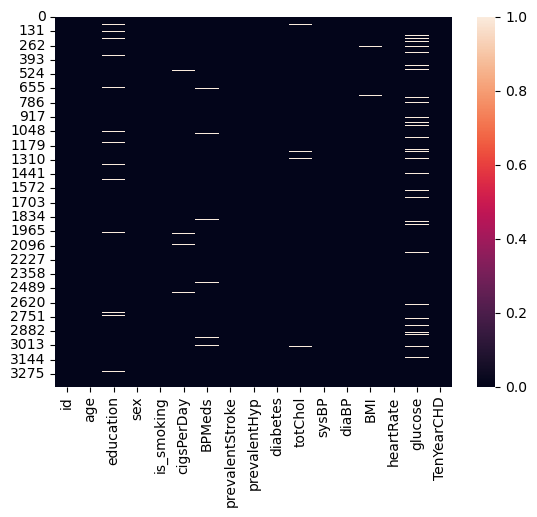

In [1956]:
# Visualizing the missing values
sns.heatmap(df.isna());

### What did you know about your dataset?

The dataset contains a mix of numerical and categorical columns. It appears that there are missing values in some columns, as indicated by the "Non-Null Count" and the summary provided showing the count of missing values for each column. Additionally, there are no duplicate rows in the dataset.

It seems like this dataset could potentially be used for analyzing the factors associated with coronary heart disease risk and making predictions based on the given attributes. Further exploration and preprocessing might be necessary to handle the missing values and to prepare the data for analysis or modeling.

## ***2. Understanding Your Variables***

In [1960]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [1961]:
# Dataset Describe
df.describe()

id     age  education  cigsPerDay  BPMeds  prevalentStroke  \
count 3390.00 3390.00    3303.00     3368.00 3346.00          3390.00   
mean  1694.50   49.54       1.97        9.07    0.03             0.01   
std    978.75    8.59       1.02       11.88    0.17             0.08   
min      0.00   32.00       1.00        0.00    0.00             0.00   
25%    847.25   42.00       1.00        0.00    0.00             0.00   
50%   1694.50   49.00       2.00        0.00    0.00             0.00   
75%   2541.75   56.00       3.00       20.00    0.00             0.00   
max   3389.00   70.00       4.00       70.00    1.00             1.00   

       prevalentHyp  diabetes  totChol   sysBP   diaBP     BMI  heartRate  \
count       3390.00   3390.00  3352.00 3390.00 3390.00 3376.00    3389.00   
mean           0.32      0.03   237.07  132.60   82.88   25.79      75.98   
std            0.46      0.16    45.25   22.29   12.02    4.12      11.97   
min            0.00      0.00   107.00   83.50   48.00   15.96      45.00   
25%            0.00      0.00   206.00  117.00   74.50   23.02      68.00   
50%            0.00      0.00   234.00  128.50   82.00   25.38      75.00   
75%            1.00      0.00   264.00  144.00   90.00   28.04      83.00   
max            1.00      1.00   696.00  295.00  142.50   56.80     143.00   

       glucose  TenYearCHD  
count  3086.00     3390.00  
mean     82.09        0.15  
std      24.24        0.36  
min      40.00        0.00  
25%      71.00        0.00  
50%      78.00        0.00  
75%      87.00        0.00  
max     394.00        1.00

### Variables Description 

- **Sex:** male or female ("M" or "F")
- **Age:** Age of the patient (Continuous) - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous


- **is_smoking:** whether or not the patient is a current smoker ("YES" or "NO")
- **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day (Continuous) - can be considered continuous as one can have any number of cigarettes, even half a cigarette.


- **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)
- **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)
- **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)
- **Diabetes:** whether or not the patient had diabetes (Nominal)



- **Tot Chol:** total cholesterol level (Continuous)
- **Sys BP:** systolic blood pressure (Continuous)
- **Dia BP:** diastolic blood pressure (Continuous)
- **BMI:** Body Mass Index (Continuous)
- **Heart Rate:** heart rate (Continuous) - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of the large number of possible values.
- **Glucose:** glucose level (Continuous)

- **10-year risk of coronary heart disease (CHD):** Binary target variable ("1" means "Yes", "0" means "No")

Please note that "Continuous" variables represent numeric measurements, "Nominal" variables represent categorical data with no inherent order, and the "Binary" variable represents a two-class classification target.


### Check Number of Unique Values for each variable.

In [1965]:
# Check No. of Unique Values for each variable.
for i in df.columns:
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in id is 3390
No. of unique values in age is 39
No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 32
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in totChol is 240
No. of unique values in sysBP is 226
No. of unique values in diaBP is 142
No. of unique values in BMI is 1259
No. of unique values in heartRate is 68
No. of unique values in glucose is 132
No. of unique values in TenYearCHD is 2


In [1966]:
# checking categorical values for each variable.
for i in df.select_dtypes(object).columns:
  print(i,' - ',df[i].unique())

sex  -  ['F' 'M']
is_smoking  -  ['YES' 'NO']


## 3. ***Data Cleaning***

In [1968]:
# Dropping id column as doesn't need for analysis
df.drop('id', axis=1, inplace=True)

In [1969]:
df.head(2)

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64       2.00   F        YES        3.00    0.00                0   
1   36       4.00   M         NO        0.00    0.00                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP   BMI  heartRate  glucose  \
0             0         0   221.00 148.00  85.00   NaN      90.00    80.00   
1             1         0   212.00 168.00  98.00 29.77      72.00    75.00   

   TenYearCHD  
0           1  
1           0

In [1970]:
df.isna().sum()[df.isna().sum()>0]

education      87
cigsPerDay     22
BPMeds         44
totChol        38
BMI            14
heartRate       1
glucose       304
dtype: int64

In [1971]:
df.education.value_counts()

1.00    1391
2.00     990
3.00     549
4.00     373
Name: education, dtype: int64

In [1972]:
df.BPMeds.value_counts()

0.00    3246
1.00     100
Name: BPMeds, dtype: int64

In [1973]:
# Creating a function to fill null values of categorical columns with mode
def mode_fillna(df, cols):   
    ''' Null values of categorical columns are filled with the mode of the column'''
    for col in cols:
        df[col] = df[col].fillna(df[col].mode()[0])

In [1974]:
mode_fillna(df, cols=['education','BPMeds'])

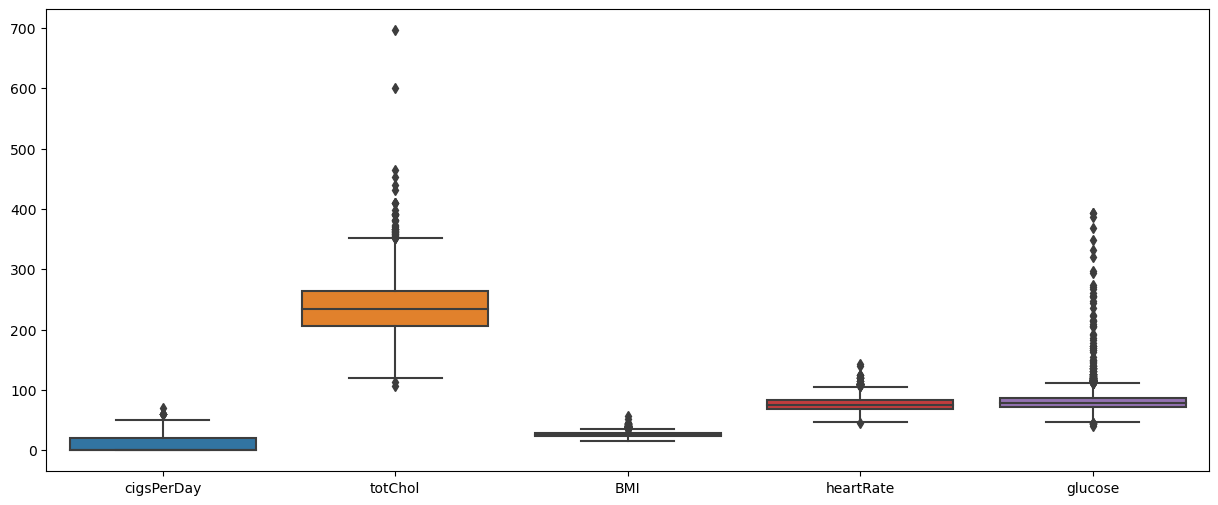

In [1975]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df[['cigsPerDay', 'totChol','BMI','heartRate','glucose']]);

In [1976]:
# Creating a function to fill null values of continous columns with median
def median_fillna(df, cols):   
    ''' Null values of continous columns are filled with the median of the column '''
    for col in cols:
        df[col] = df[col].fillna(df[col].mode()[0])

In [1977]:
median_fillna(df, cols = ['cigsPerDay', 'totChol','BMI','heartRate','glucose'] )

In [1978]:
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**All null values have been successfully filled strategically.**

In [1980]:
# No cigarettes smoked throughout the day but in the smoking column it is yes so, it needs to be managed.
df[ (df['is_smoking'] == 'YES') & (df['cigsPerDay'] ==0) ]

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
422    55       1.00   F        YES        0.00    0.00                0   
466    45       3.00   M        YES        0.00    0.00                0   
469    42       1.00   M        YES        0.00    0.00                0   
491    61       1.00   F        YES        0.00    0.00                0   
538    41       1.00   F        YES        0.00    0.00                0   
767    54       1.00   M        YES        0.00    0.00                0   
1461   47       2.00   F        YES        0.00    0.00                0   
1467   49       1.00   F        YES        0.00    0.00                0   
1597   57       1.00   F        YES        0.00    0.00                0   
1986   49       2.00   F        YES        0.00    0.00                0   
2031   58       4.00   F        YES        0.00    0.00                0   
2087   49       4.00   M        YES        0.00    0.00                0   
2240   47       3.00   F        YES        0.00    0.00                0   
2284   45       2.00   M        YES        0.00    0.00                0   
2527   58       2.00   M        YES        0.00    0.00                0   
2638   57       1.00   M        YES        0.00    0.00                0   
2648   39       2.00   M        YES        0.00    0.00                0   
2723   43       4.00   M        YES        0.00    0.00                0   
2879   42       1.00   M        YES        0.00    0.00                0   
2945   53       2.00   M        YES        0.00    0.00                0   
3301   55       1.00   M        YES        0.00    0.00                0   
3378   39       3.00   F        YES        0.00    0.00                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP   BMI  heartRate  glucose  \
422              1         0   213.00 163.00  91.00 28.66      69.00    66.00   
466              1         0   170.00 145.50  99.00 26.74      83.00    85.00   
469              0         0   196.00 123.00  73.00 22.06      66.00    75.00   
491              1         0   356.00 168.00  98.00 27.30     103.00   106.00   
538              0         0   171.00 135.00  82.50 24.35      79.00    82.00   
767              0         0   219.00 110.00  72.00 26.05      95.00    86.00   
1461             0         0   365.00 127.00  76.00 24.44      72.00    80.00   
1467             0         0   252.00 123.00  69.00 21.45      72.00    89.00   
1597             0         0   229.00 115.00  69.00 24.43      80.00    93.00   
1986             1         0   233.00 158.00 102.00 25.31      90.00    72.00   
2031             1         0   270.00 195.00 117.50 23.35      75.00    75.00   
2087             0         0   256.00 127.50  81.50 28.21      93.00    85.00   
2240             0         0   321.00 132.00  88.00 28.14      90.00    74.00   
2284             0         0   248.00 121.00  72.00 27.88      64.00    88.00   
2527             0         0   235.00 127.50  76.00 21.02      81.00   135.00   
2638             0         0   223.00 107.50  72.50 24.74      62.00   103.00   
2648             0         0   285.00 121.00  82.00 27.62      85.00    65.00   
2723             0         0   222.00 109.50  69.00 25.50      75.00    75.00   
2879             0         0   226.00 119.00  80.00 25.29      62.00    98.00   
2945             0         0   276.00 130.00  86.00 24.21      58.00    82.00   
3301             0         0   214.00 132.50  85.50 29.25      70.00   103.00   
3378             0         0   197.00 126.50  76.50 19.71      55.00    63.00   

      TenYearCHD  
422            0  
466            0  
469            0  
491            0  
538            0  
767            0  
1461           0  
1467           0  
1597           0  
1986           0  
2031           0  
2087           1  
2240           0  
2284           0  
2527           0  
2638           0  
2648           0  
2723           0  
2879           0  
2945         

*No cigarettes smoked throughout the day but in the smoking column it is yes so, it needs to be managed.*

In [1982]:
rows_to_update = (df['is_smoking'] == 'YES') & (df['cigsPerDay'] ==0)
df.loc[rows_to_update, 'is_smoking'] ='NO'

In [1983]:
df[ (df['is_smoking'] == 'YES') & (df['cigsPerDay'] ==0) ]

Empty DataFrame
Columns: [age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

In [1984]:
df[ (df['is_smoking'] == 'NO') & (df['cigsPerDay'] ==1)]

Empty DataFrame
Columns: [age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

In case of is_smoking == 'NO' column is correctly mapped with cigarettes per day column.

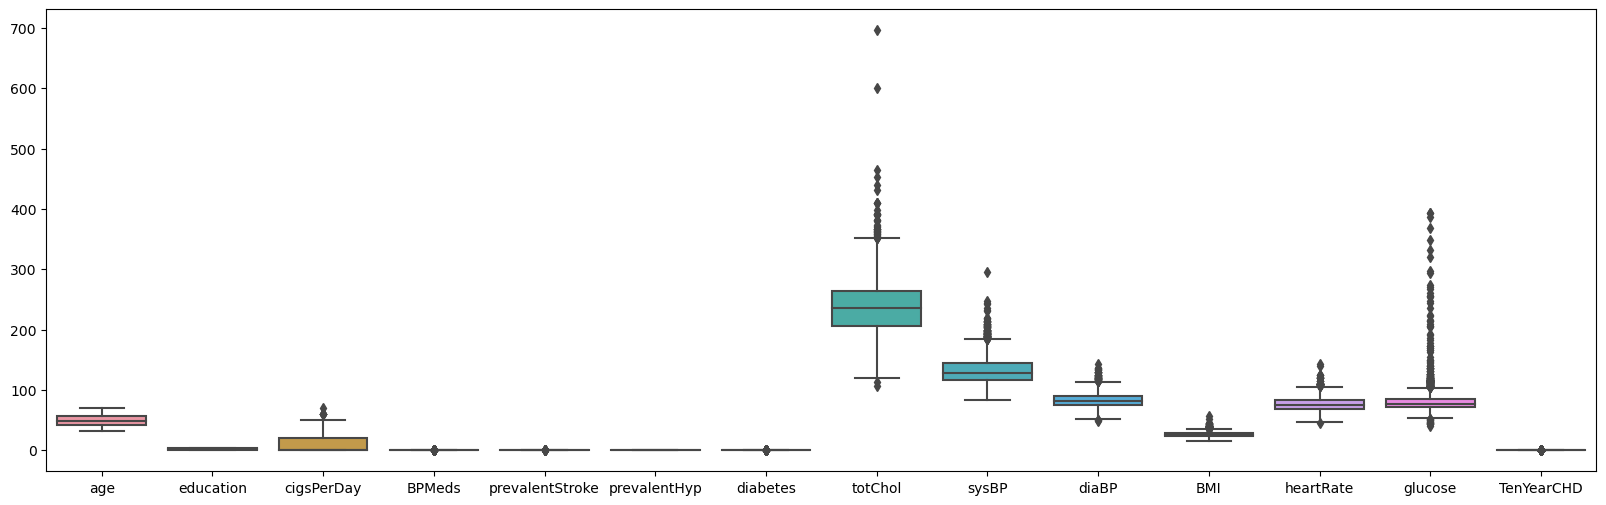

In [1986]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df);

In [1987]:
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64       2.00   F        YES        3.00    0.00                0   
1   36       4.00   M         NO        0.00    0.00                0   
2   46       1.00   F        YES       10.00    0.00                0   
3   50       1.00   M        YES       20.00    0.00                0   
4   64       1.00   F        YES       30.00    0.00                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP   BMI  heartRate  glucose  \
0             0         0   221.00 148.00  85.00 22.91      90.00    80.00   
1             1         0   212.00 168.00  98.00 29.77      72.00    75.00   
2             0         0   250.00 116.00  71.00 20.35      88.00    94.00   
3             1         0   233.00 158.00  88.00 28.26      68.00    94.00   
4             0         0   241.00 136.50  85.00 26.42      70.00    77.00   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

## 3. ***Data Wrangling***

### Data Wrangling Code

In [1990]:
avg_age_by_gender  = df.groupby('sex',as_index=False)['age'].mean()
avg_age_by_gender 

sex   age
0   F 49.86
1   M 49.13

In [1991]:
avg_chd_risk_by_education = df.groupby('education',as_index=False)['TenYearCHD'].mean()
avg_chd_risk_by_education.rename(columns={'TenYearCHD':'Avg_Child_Risk'})

education  Avg_Child_Risk
0       1.00            0.18
1       2.00            0.12
2       3.00            0.13
3       4.00            0.14

In [1992]:
max_bmi_by_smoking = df.groupby('is_smoking',as_index=False)['BMI'].max()
max_bmi_by_smoking.rename(columns={'BMI':'Avg_BMI'})

is_smoking  Avg_BMI
0         NO    56.80
1        YES    44.27

In [1993]:
df.groupby('diabetes',as_index=False)['sysBP'].median()

diabetes  sysBP
0         0 128.00
1         1 146.00

The median systolic blood pressure for individuals without diabetes is 128.0 mmHg. This value represents the middle blood pressure value for non-diabetic individuals in the dataset.

The median systolic blood pressure for individuals with diabetes is 146.0 mmHg. This value represents the middle blood pressure value for diabetic individuals in the dataset.

The difference in median systolic blood pressure between individuals with and without diabetes is 146.0 - 128.0 = 18.0 mmHg. This suggests that, on average, individuals with diabetes might have a higher systolic blood pressure compared to those without diabetes.

In [1995]:
custom_aggregations = {
    'age': 'mean',
    'BMI': 'max',
    'heartRate': 'min'
}
summary_by_gender = df.groupby('sex').agg(custom_aggregations)
summary_by_gender

age   BMI  heartRate
sex                       
F   49.86 56.80      47.00
M   49.13 40.38      45.00

The provided data has been grouped by gender (Females and Males), and key statistics have been calculated for each group. On average, females in the dataset are slightly older (49.86 years) than males (49.13 years). Additionally, females have a higher average BMI (56.80) compared to males (40.38). In terms of heart rate, females exhibit a slightly higher average heart rate (47.0 beats per minute) than males (45.0 beats per minute). These findings suggest potential gender-based differences in age, BMI, and heart rate within the dataset, though further analysis might be needed to validate the significance of these distinctions and explore underlying factors.

In [1997]:
df.groupby(['education','diabetes'])['totChol'].mean()

education  diabetes
1.00       0          238.18
           1          242.64
2.00       0          235.36
           1          283.94
3.00       0          235.96
           1          271.20
4.00       0          235.39
           1          241.67
Name: totChol, dtype: float64

In [1998]:
avg_total_cholestrol = df.pivot_table(values='totChol', index=['education', 'diabetes'],columns='sex', aggfunc=np.mean)
avg_total_cholestrol

sex                     F      M
education diabetes              
1.00      0        241.79 233.74
          1        252.97 230.24
2.00      0        236.78 233.26
          1        302.45 243.20
3.00      0        237.80 232.25
          1        274.33 266.50
4.00      0        238.54 233.18
          1           NaN 241.67

In [1999]:
df.groupby(['is_smoking','sex'], as_index=False)['heartRate'].max()

is_smoking sex  heartRate
0         NO   F     143.00
1         NO   M     125.00
2        YES   F     122.00
3        YES   M     120.00

In [2000]:
df1 = df.copy()

In [2001]:
# Define the age bins and labels for the age groups
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

# Create a new column 'age_group' with the age groups
df1['age_group'] = pd.cut(df1['age'], bins=age_bins, labels=age_labels, right=False)

# Group by age groups and calculate median systolic blood pressure
blood_pressure_summary = df1.groupby('age_group', as_index=False)['sysBP'].median()

blood_pressure_summary.sysBP = blood_pressure_summary.sysBP.fillna(0)

blood_pressure_summary.rename(columns={'sysBP':'median systolic blood pressure '})

age_group  median systolic blood pressure 
0     20-30                             0.00
1     31-40                           119.00
2     41-50                           125.00
3     51-60                           134.00
4     61-70                           144.00
5     71-80                           139.50
6     81-90                             0.00

In [2002]:
df.groupby('TenYearCHD')[['BMI','glucose']].mean()

BMI  glucose
TenYearCHD               
0          25.67    80.14
1          26.40    88.83

In [2003]:
# Define the number of quartiles
num_quartiles = 4

# Create BMI quartiles
df1['bmi_quartile'] = pd.qcut(df1['BMI'], q=num_quartiles)

# Group by BMI quartiles and calculate median heart rate
heart_rate_summary = df1.groupby('bmi_quartile',as_index=False)['heartRate'].median()

heart_rate_summary

bmi_quartile  heartRate
0  (15.959000000000001, 22.972]      75.00
1              (22.972, 25.365]      75.00
2              (25.365, 27.998]      75.00
3                (27.998, 56.8]      75.00

In [2004]:
# Defining 3 lists containing the column names of
# This is defined based on the number of unique values for each attribute
categorical_var = [i for i in df.columns if df[i].nunique()<=4]
continuous_var = [i for i in df.columns if i not in categorical_var]

print('categorical_var ->',categorical_var,'\n')
print('continuous_var ->',continuous_var)

categorical_var -> ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD'] 

continuous_var -> ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

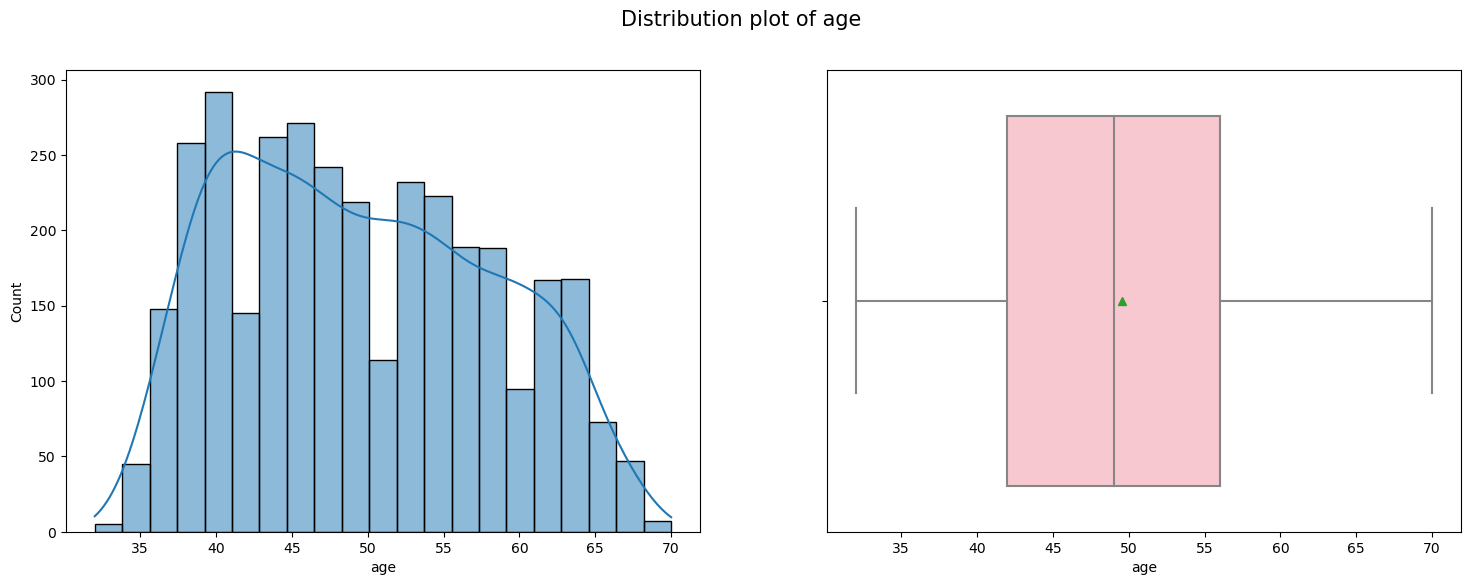

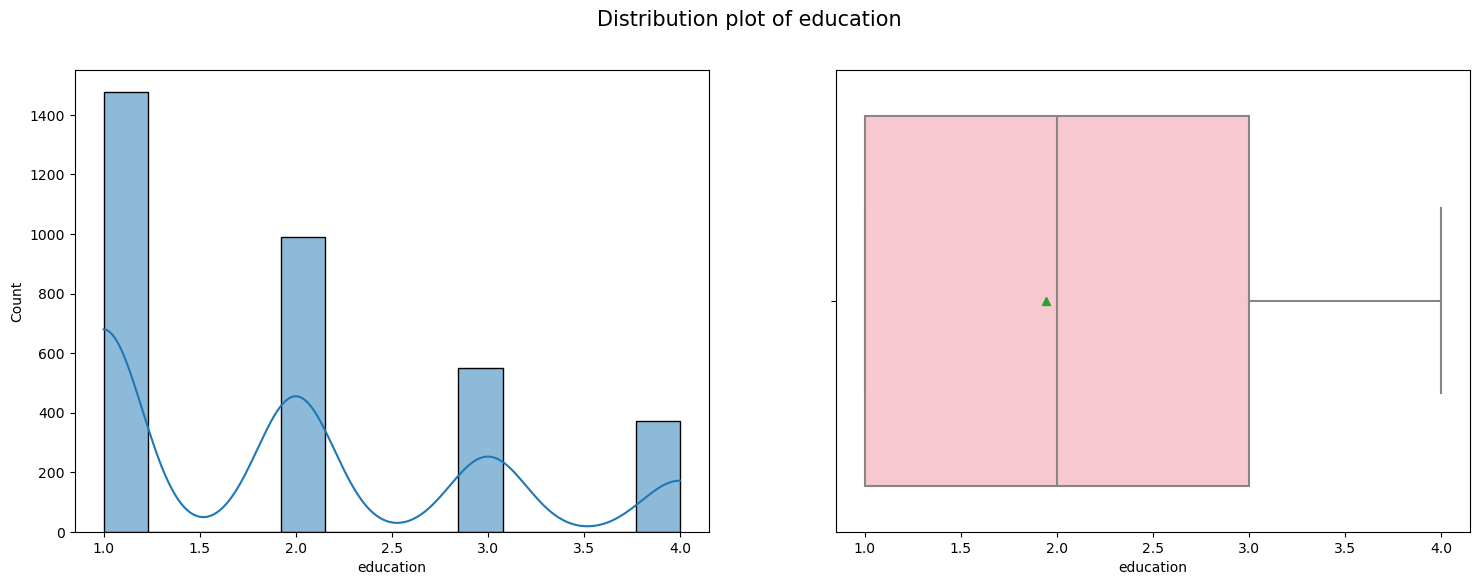

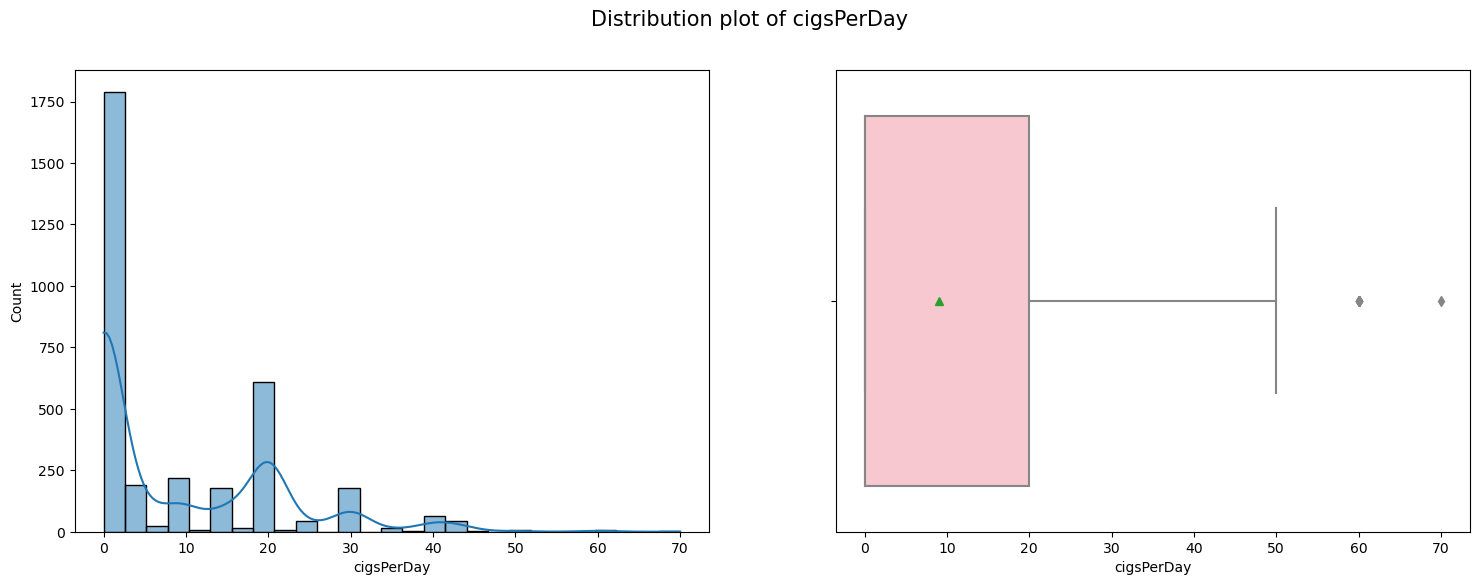

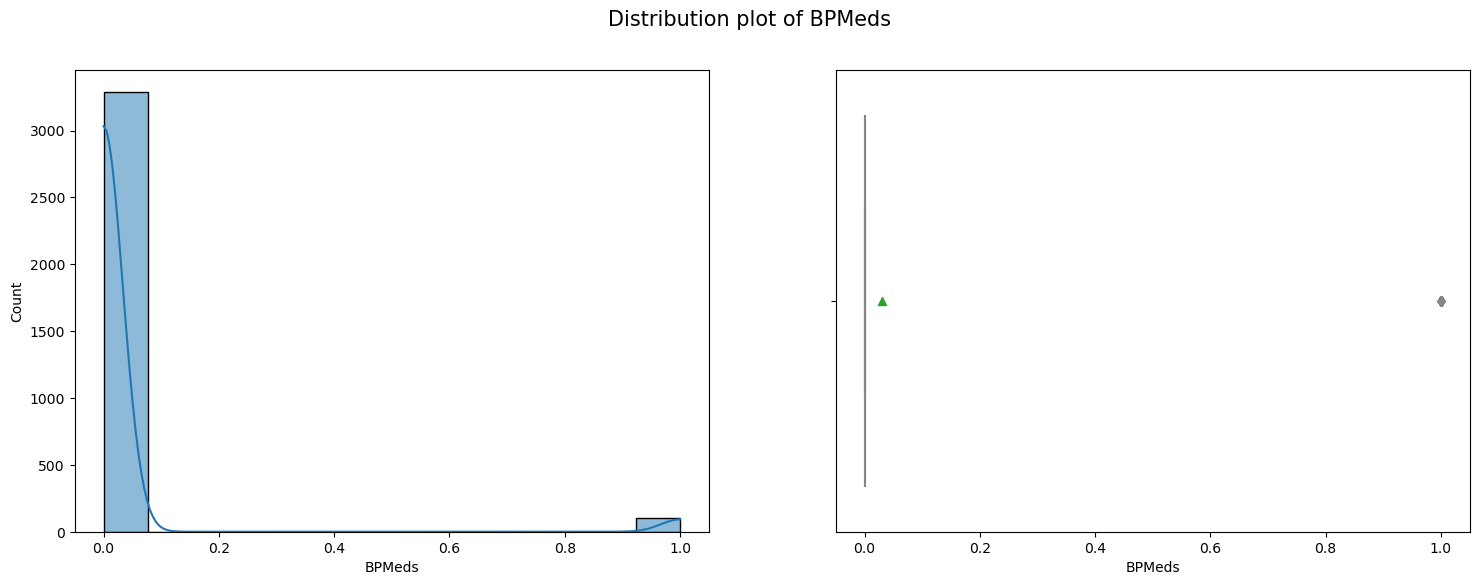

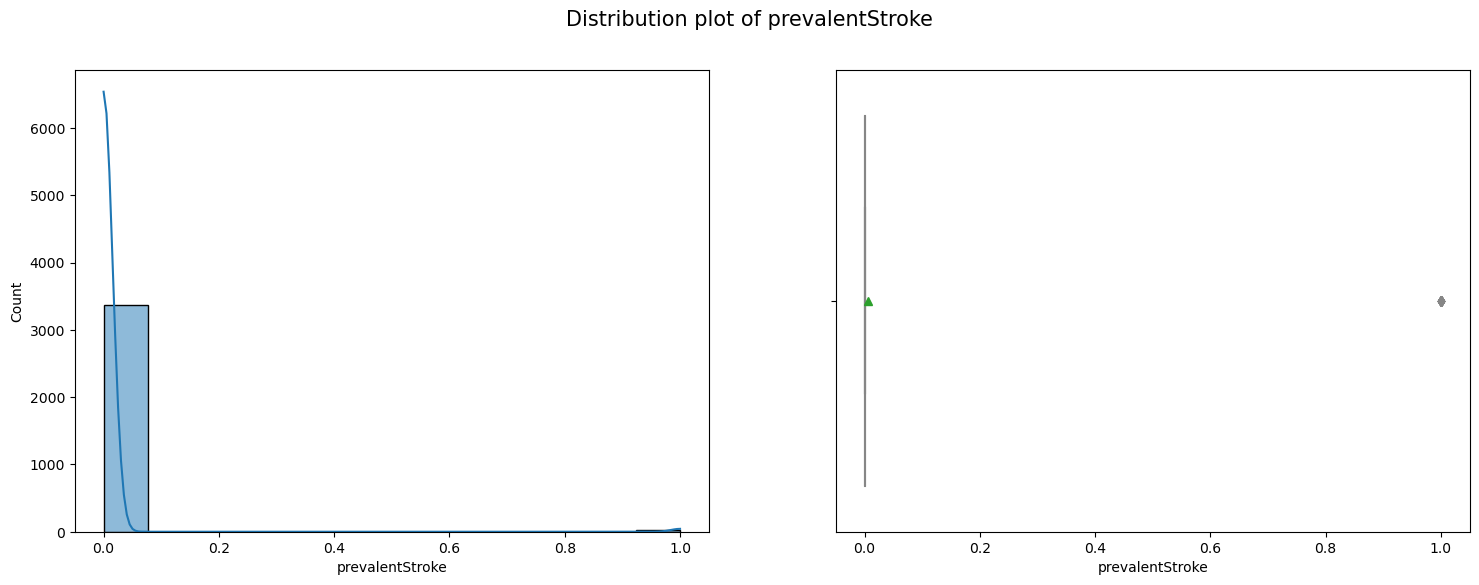

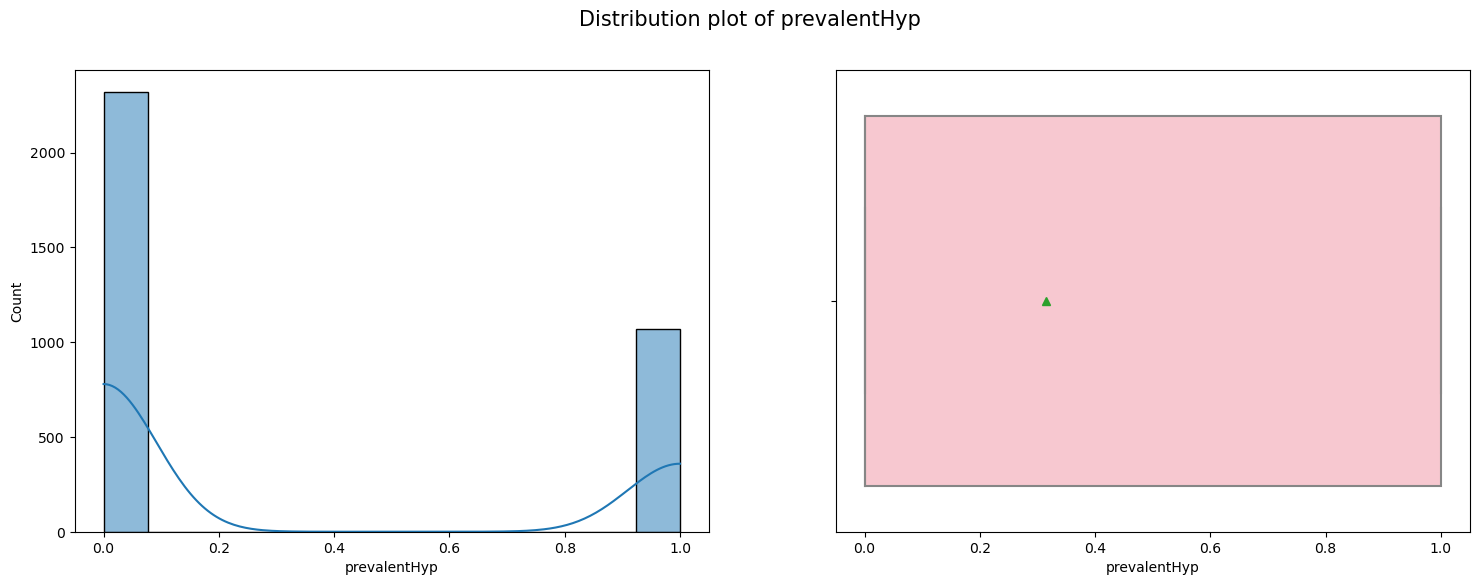

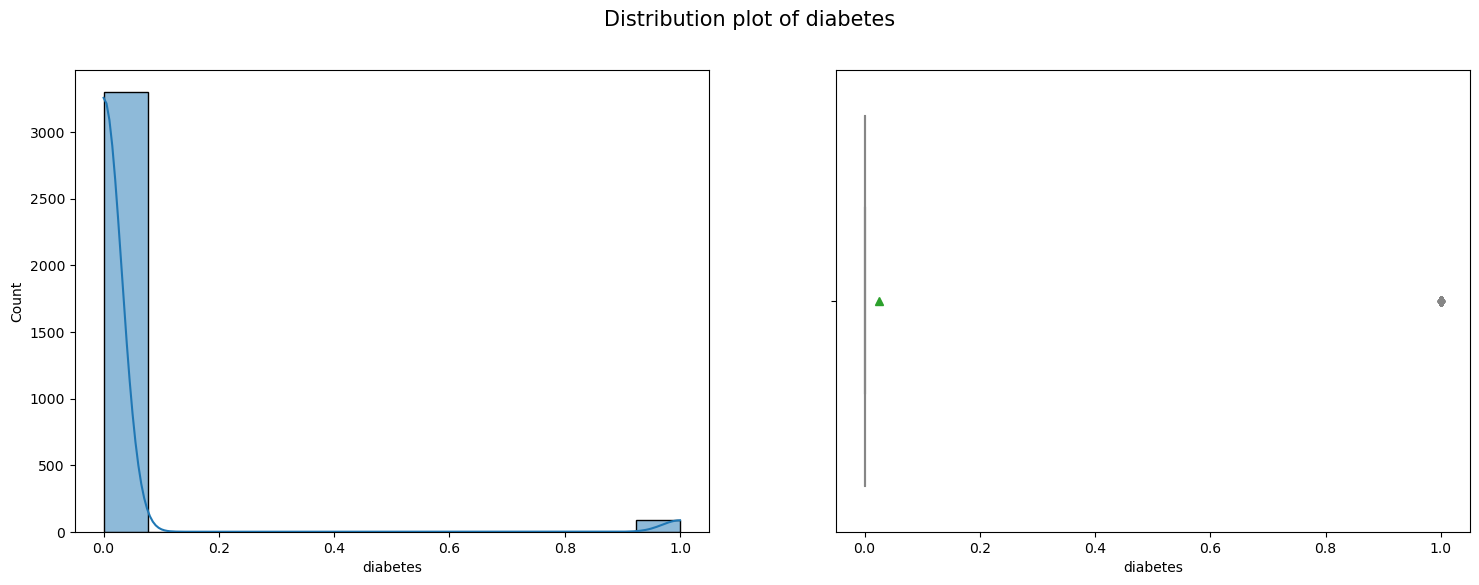

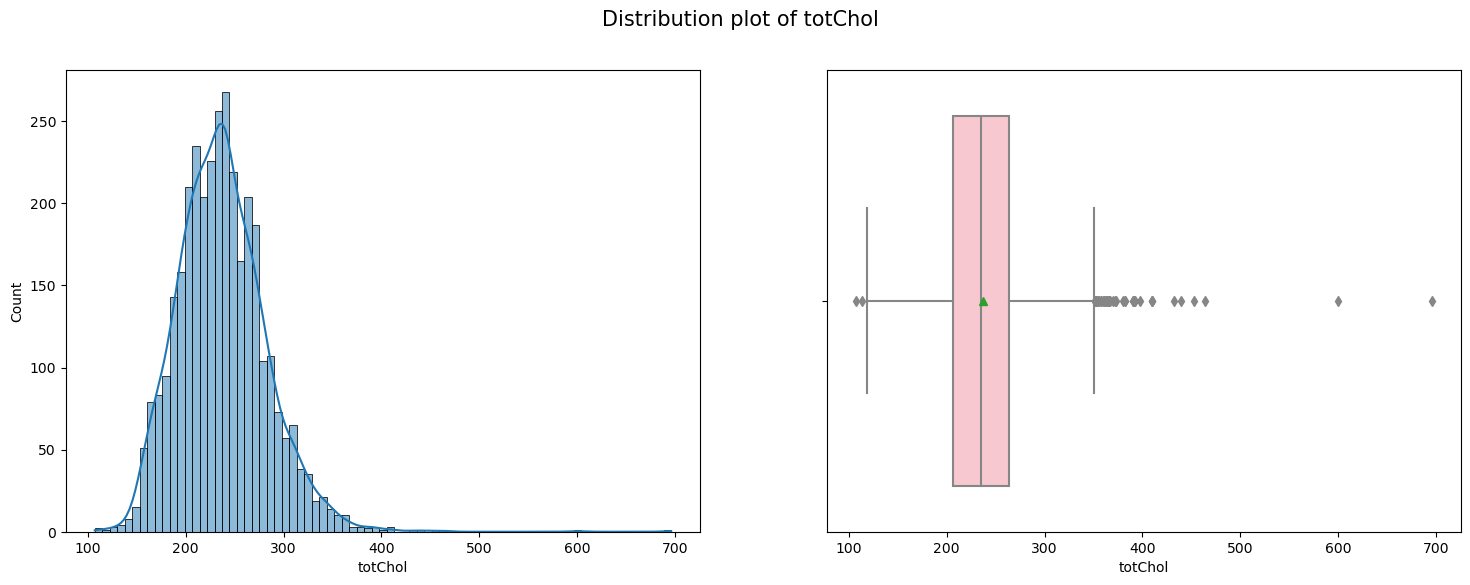

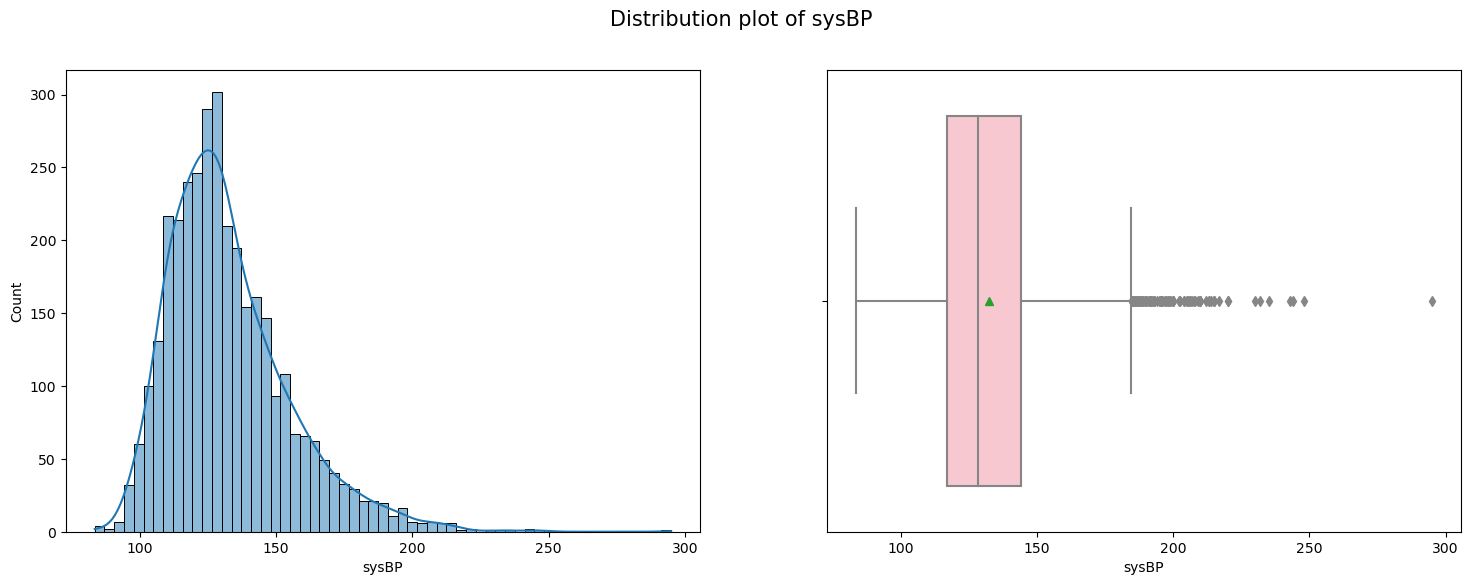

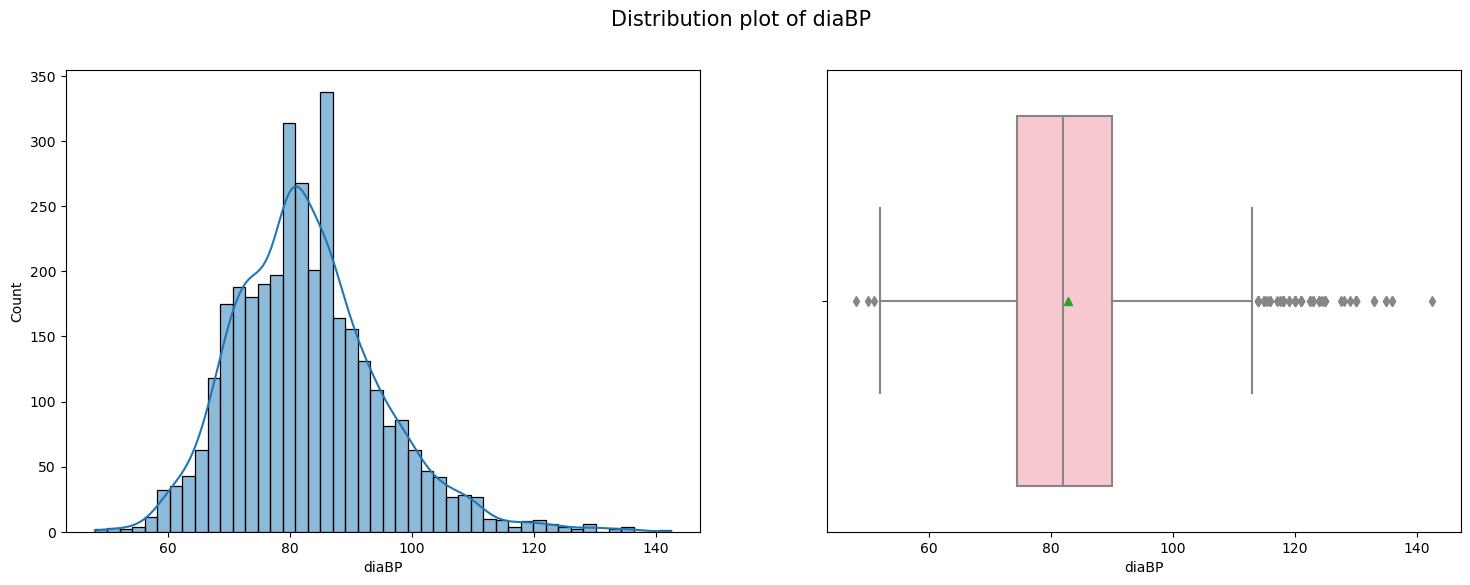

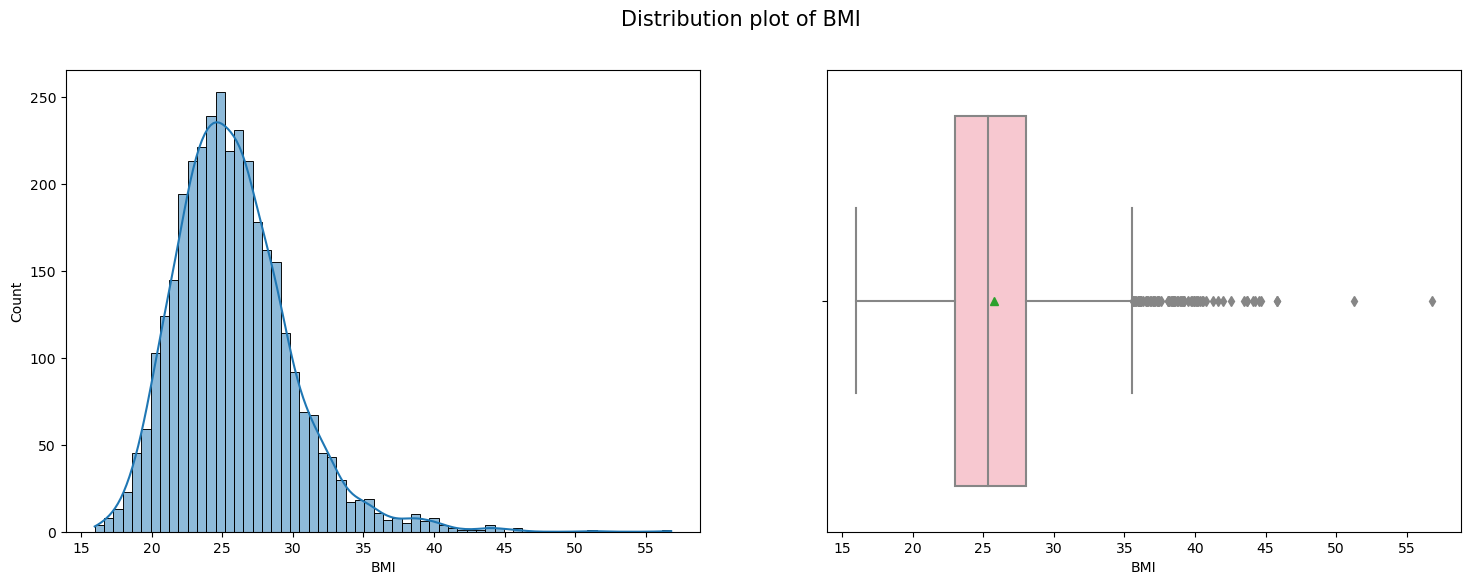

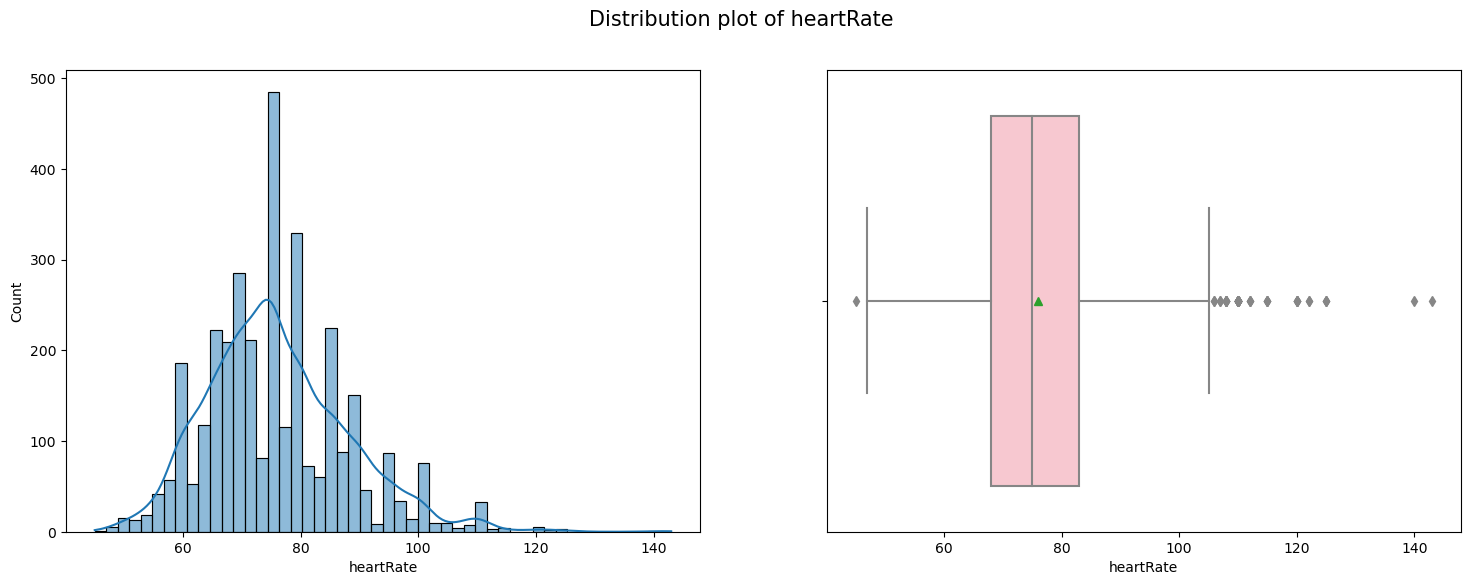

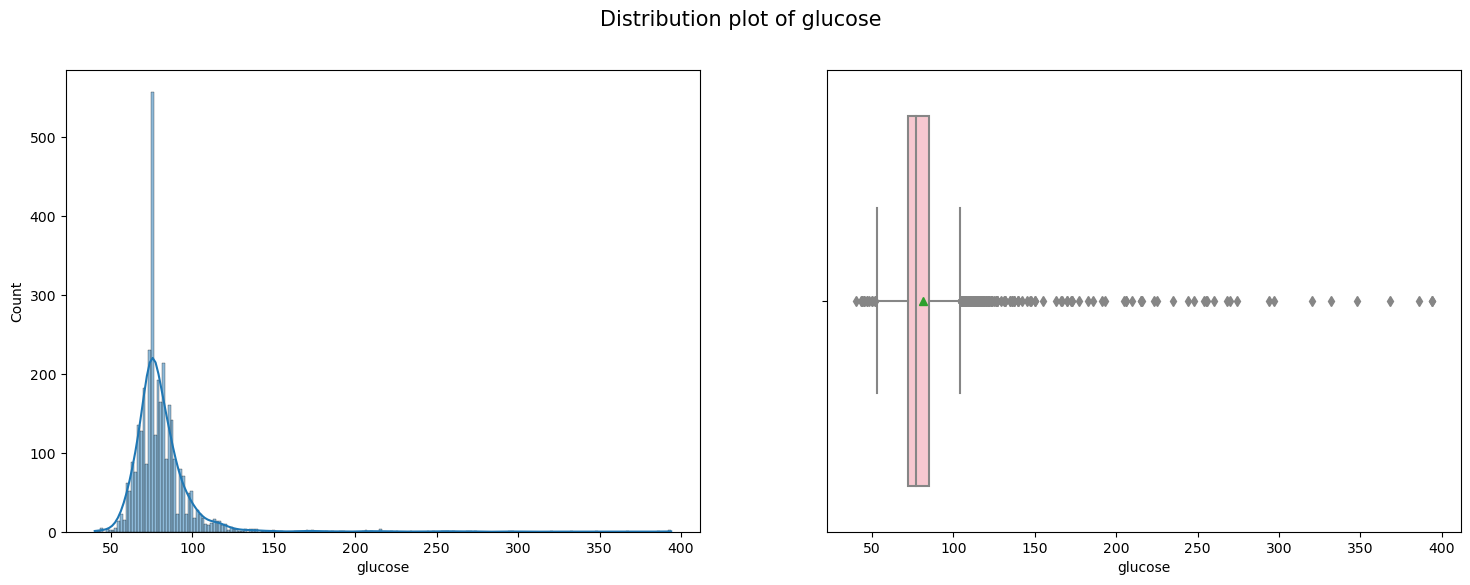

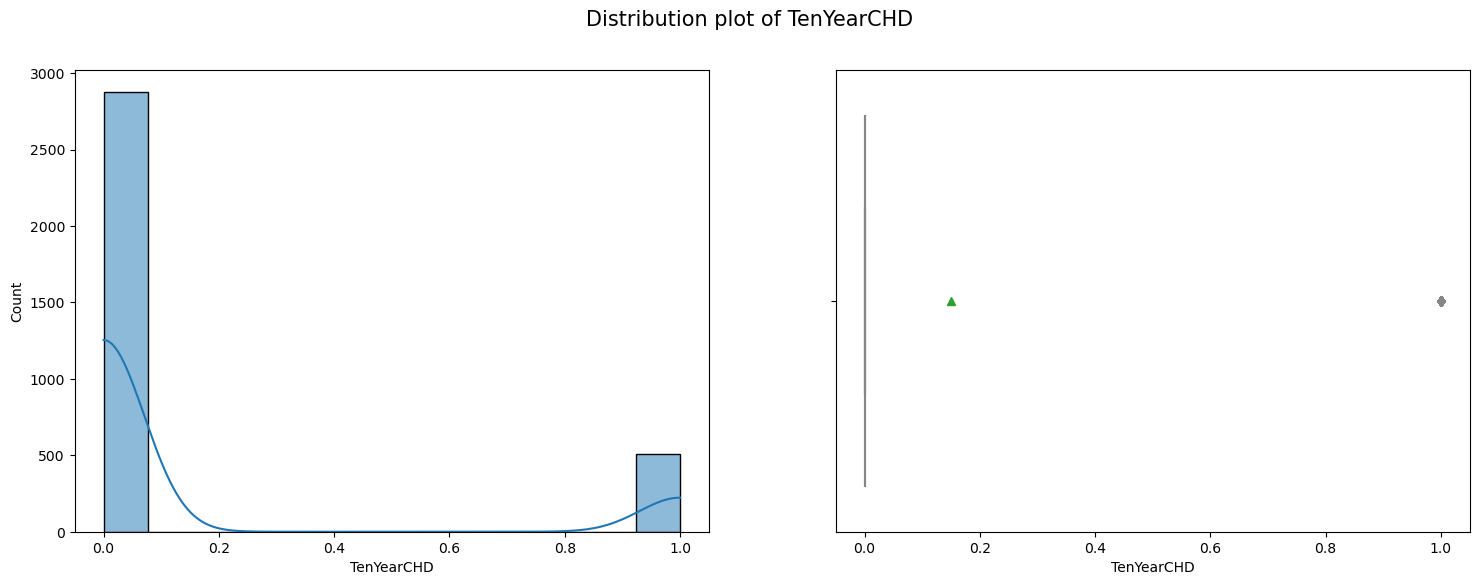

In [2007]:
# Visualizing code of histogram plot & boxplot for each columns to know the data distribution
for col in df.select_dtypes([int,float]).columns:
    fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
    sns.histplot(df[col], ax = axes[0], kde=True)
    sns.boxplot(df[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()

##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

From the distribution we see that most of the columns are normally distributed, some of them are skewed and we can see some of the categorical columns also. In the box plot, we see some outliers also which we will handle later before model building.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Histogram and Box plot cannot give us whole information regarding data. It's done just to see the distribution of the column data over the dataset and the outliers in the boxplot for the different continuous columns.

#### Chart - 2

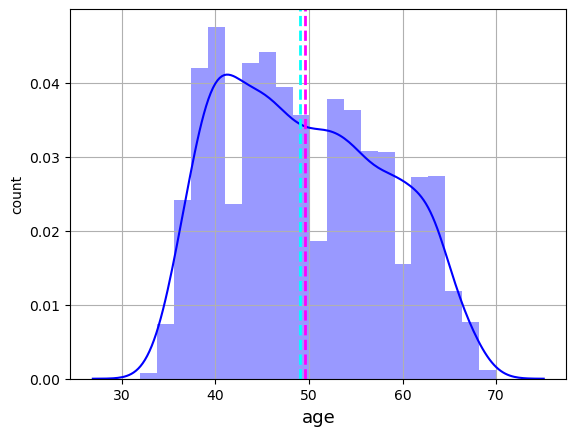

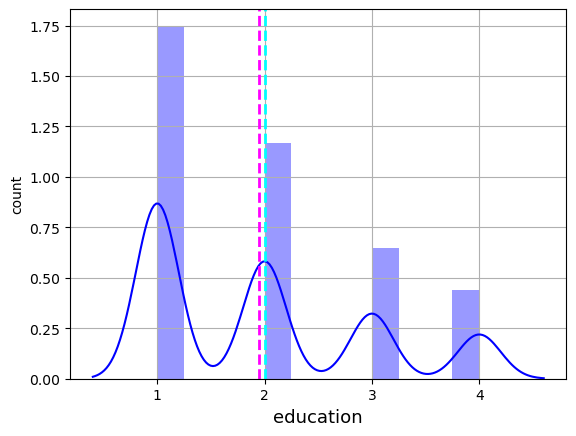

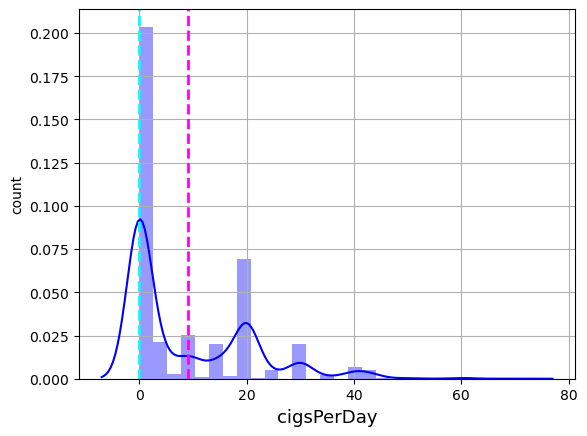

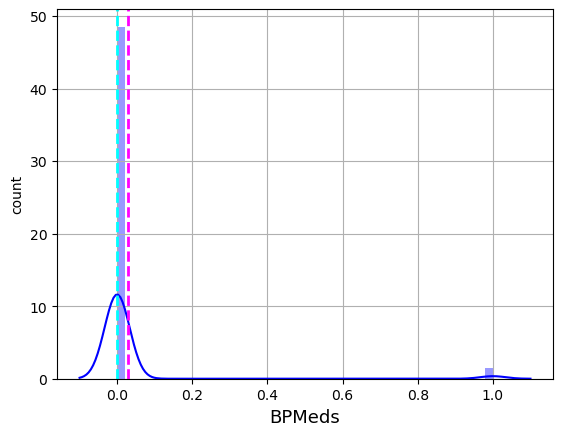

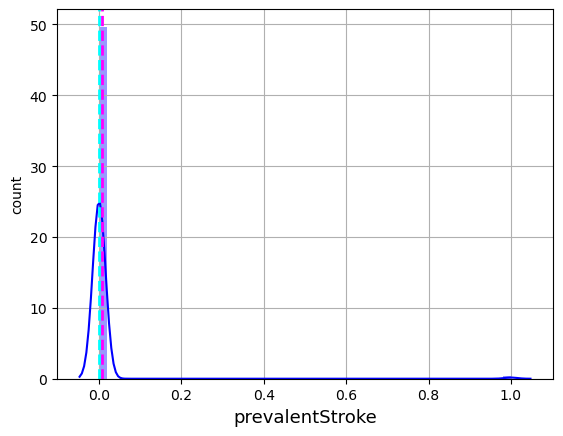

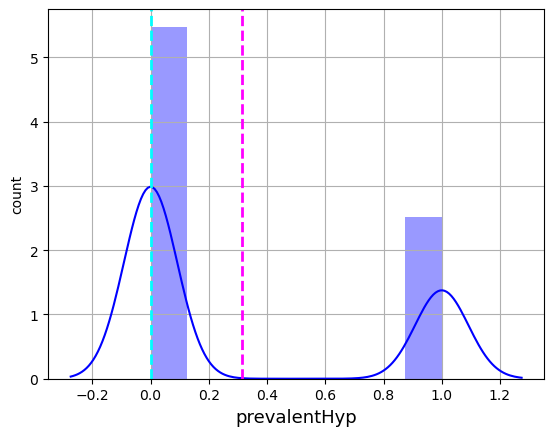

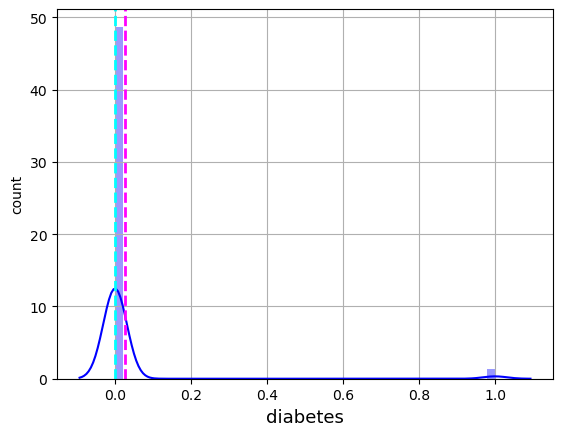

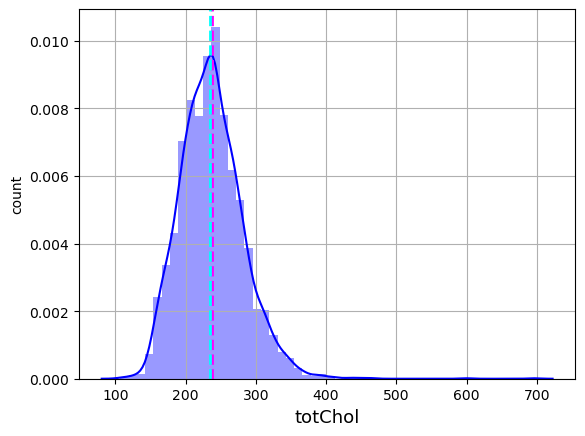

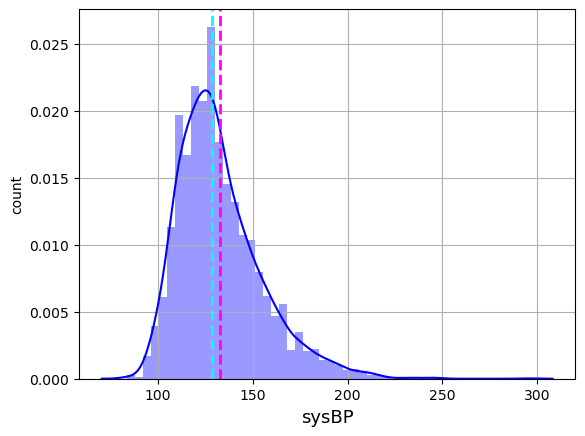

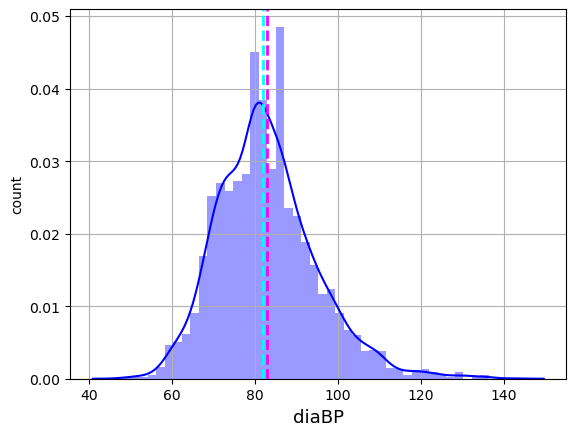

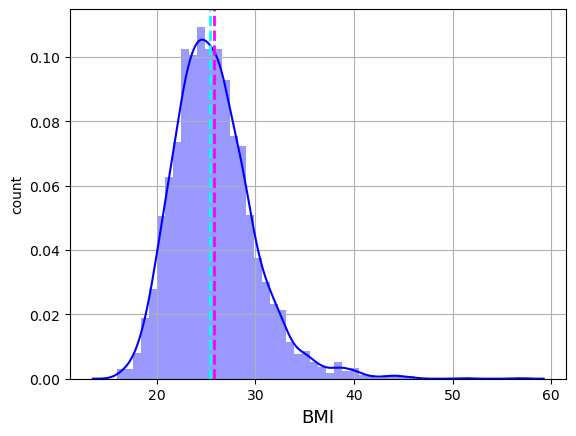

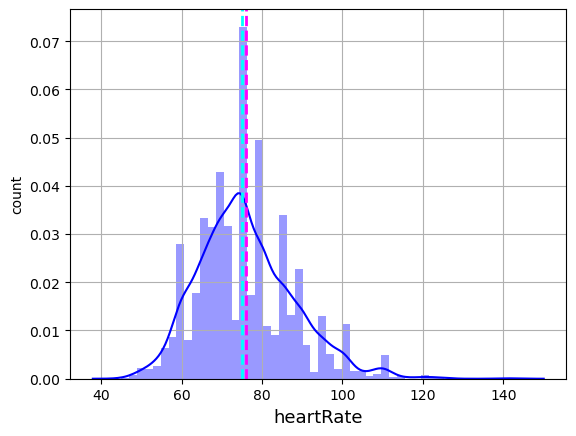

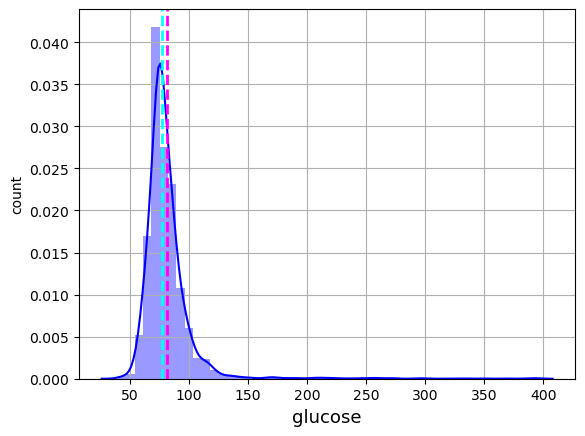

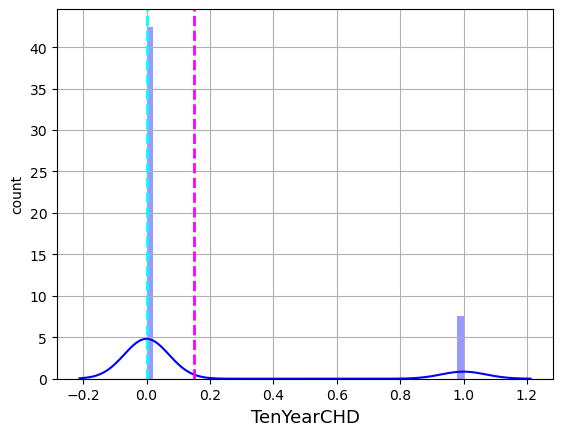

In [2015]:
# checking distribution for numerical features
for col in df.select_dtypes([int,float]).columns:
    
    sns.distplot(df[col], color='blue')
    
   #PLotting the mean and median
    plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
    plt.xlabel(col, fontsize=13)
    plt.ylabel('count')
    plt.grid()
    plt.show()

##### 1. Why did you pick the specific chart?

The choice of using a distribution plot (distplot) seems appropriate for visualizing the distribution of continuous numerical data, and here's why it might be a good choice

##### 2. What is/are the insight(s) found from the chart?

From the distribution we see that most of the columns are normally distributed, some of them are skewed and we can see some of the categorical columns also. In the box plot, we see some outliers also which we will handle later before model building.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

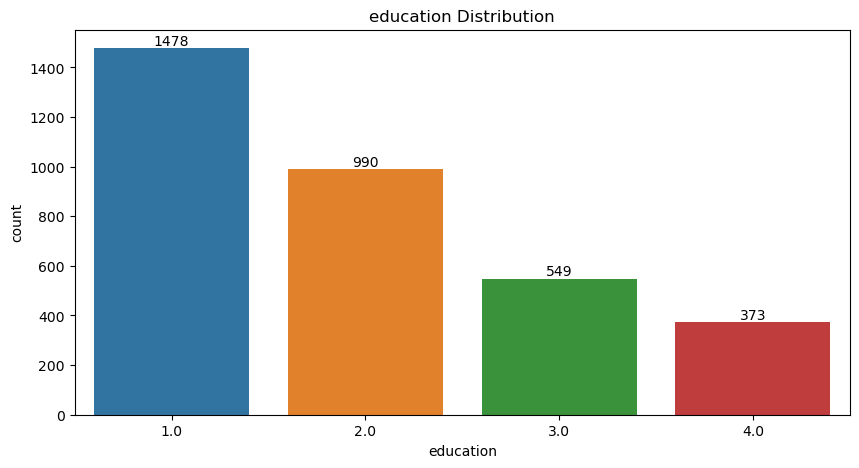

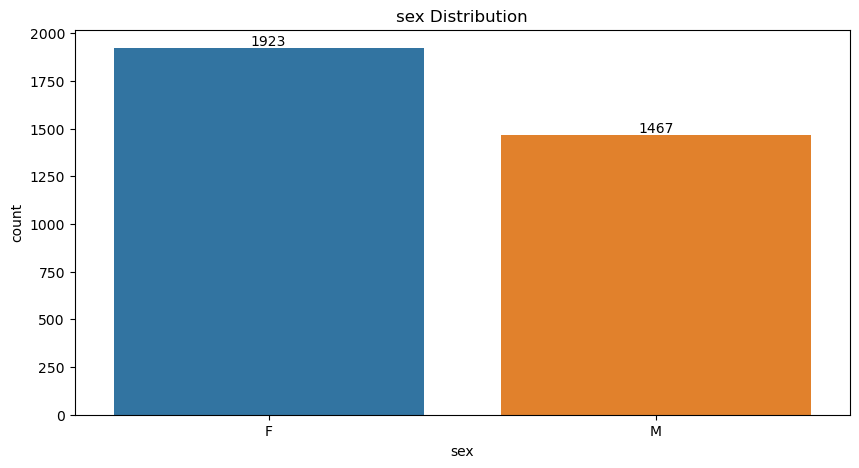

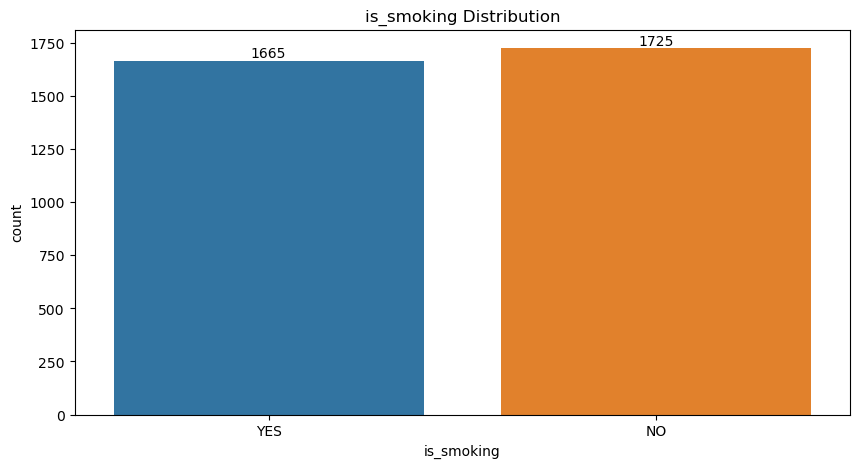

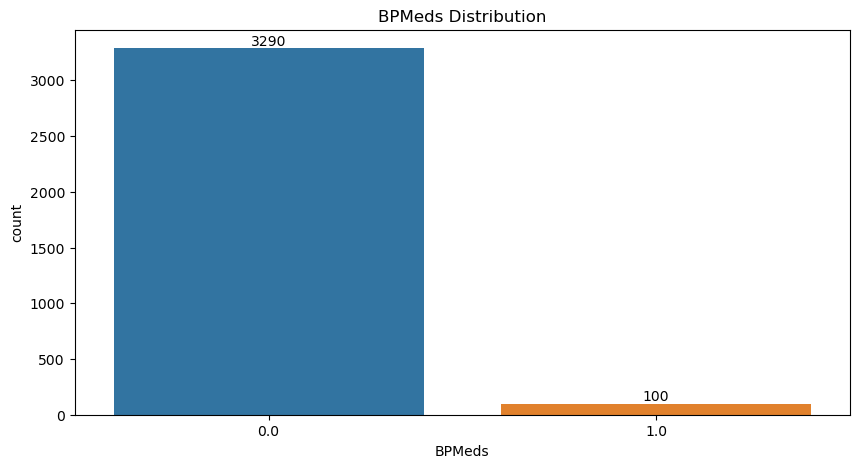

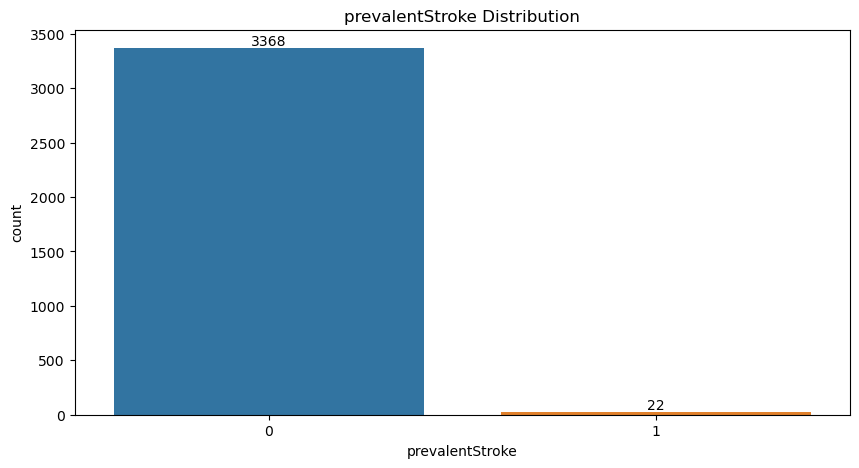

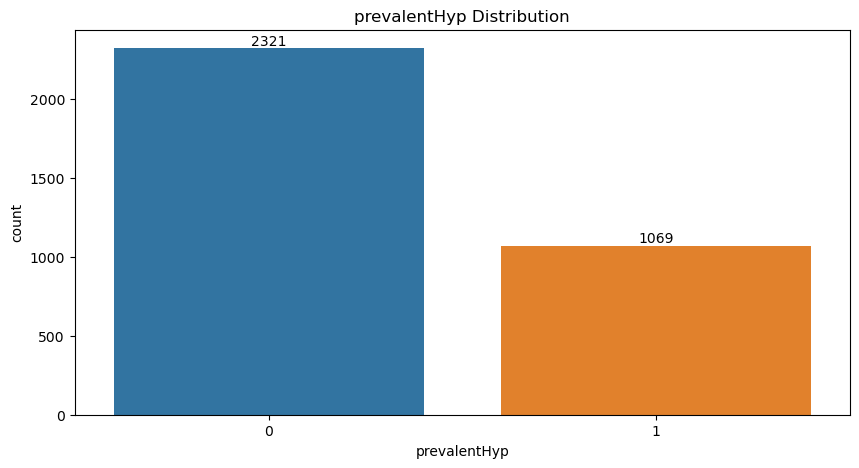

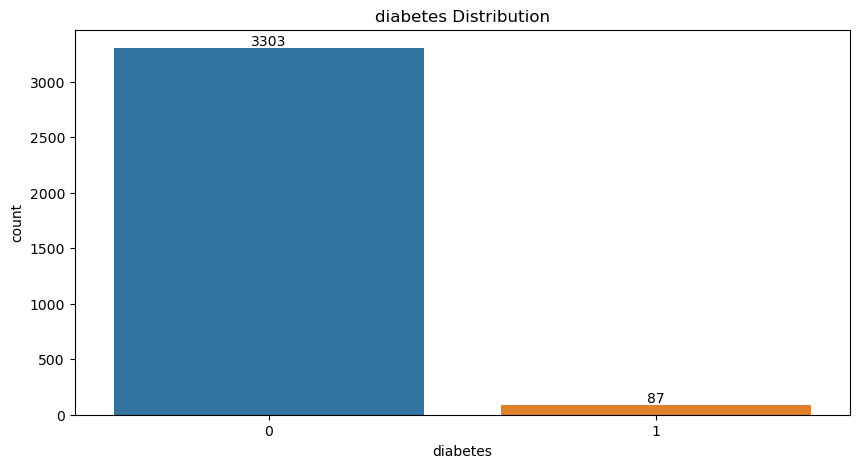

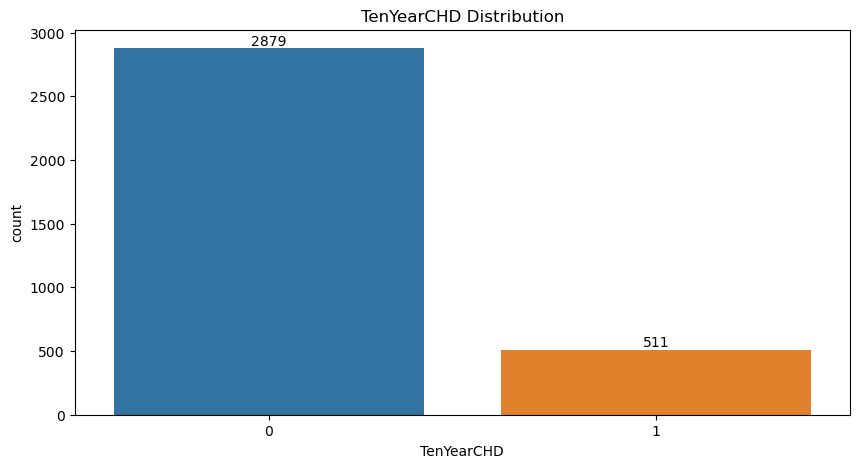

In [2023]:
# Loop through each categorical variable
for var in categorical_var:
    plt.figure(figsize=(10, 5))
    
    # Create a count plot
    p = sns.countplot(x=var, data=df)
    
    plt.xlabel(var)
    plt.title(f'{var} Distribution')
    
    # Annotate the count above each bar
    for patch in p.patches:
        plt.text(patch.get_x() + patch.get_width() / 2., patch.get_height(), str(patch.get_height()), ha='center', va='bottom')
    
    plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

The distribution of different categories in the categorical columns can be seen. The education column has the highest for the 1 category followed by 2 3 and 4.

The gender distribution is not even with high count for females. The is_smoking column is even. Bp_meds, prevalent_stroke, prevalent_hyp and diabetes are imbalanced, they have very few counts for the positive cases.

Finaly the ten_year_chd is also imbalanced with few positive cases compared to the negative cases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution of categories in various columns helps identify patterns and target specific demographics or areas of focus. For example, businesses can develop tailored marketing campaigns based on the gender distribution or design educational programs based on the education levels of the target audience. Additionally, recognizing the imbalanced distribution of health conditions can guide businesses in developing specialized treatments or preventive measures to address specific needs.

However, it is important to note that the chart alone does not provide a complete picture of the business impact. The actual impact would depend on how well these insights are utilized in business strategies and actions. Factors such as market demand, competition, and the effectiveness of the implemented strategies would also play a role in determining the overall business growth. Therefore, while the gained insights have the potential to create positive business impact, their actual realization would require further analysis and strategic implementation.

#### Chart - 5

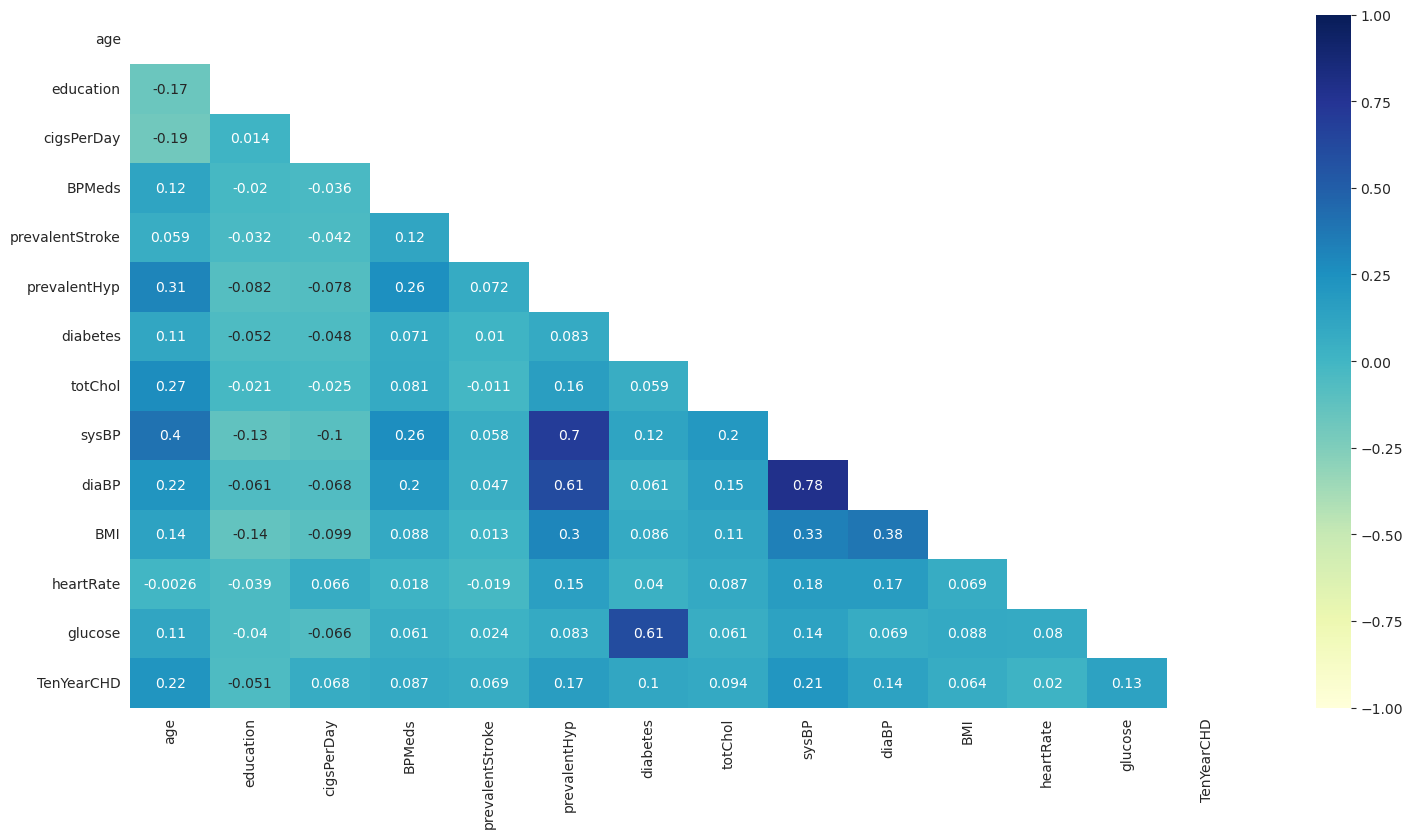

In [2031]:
# Correlation Heatmap visualization code
corr = df.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Here we see that the systolic_bp and diastolic_bp are highly correlated, also diabetes and glucose have a correlation of 0.62. Education is not importand as the CHD will not be acquired based on education level of a person so we can drop education column.

#### Chart - 6

In [2037]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [2045]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [2053]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [2061]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [2069]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [2077]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [2085]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [2092]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [2099]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

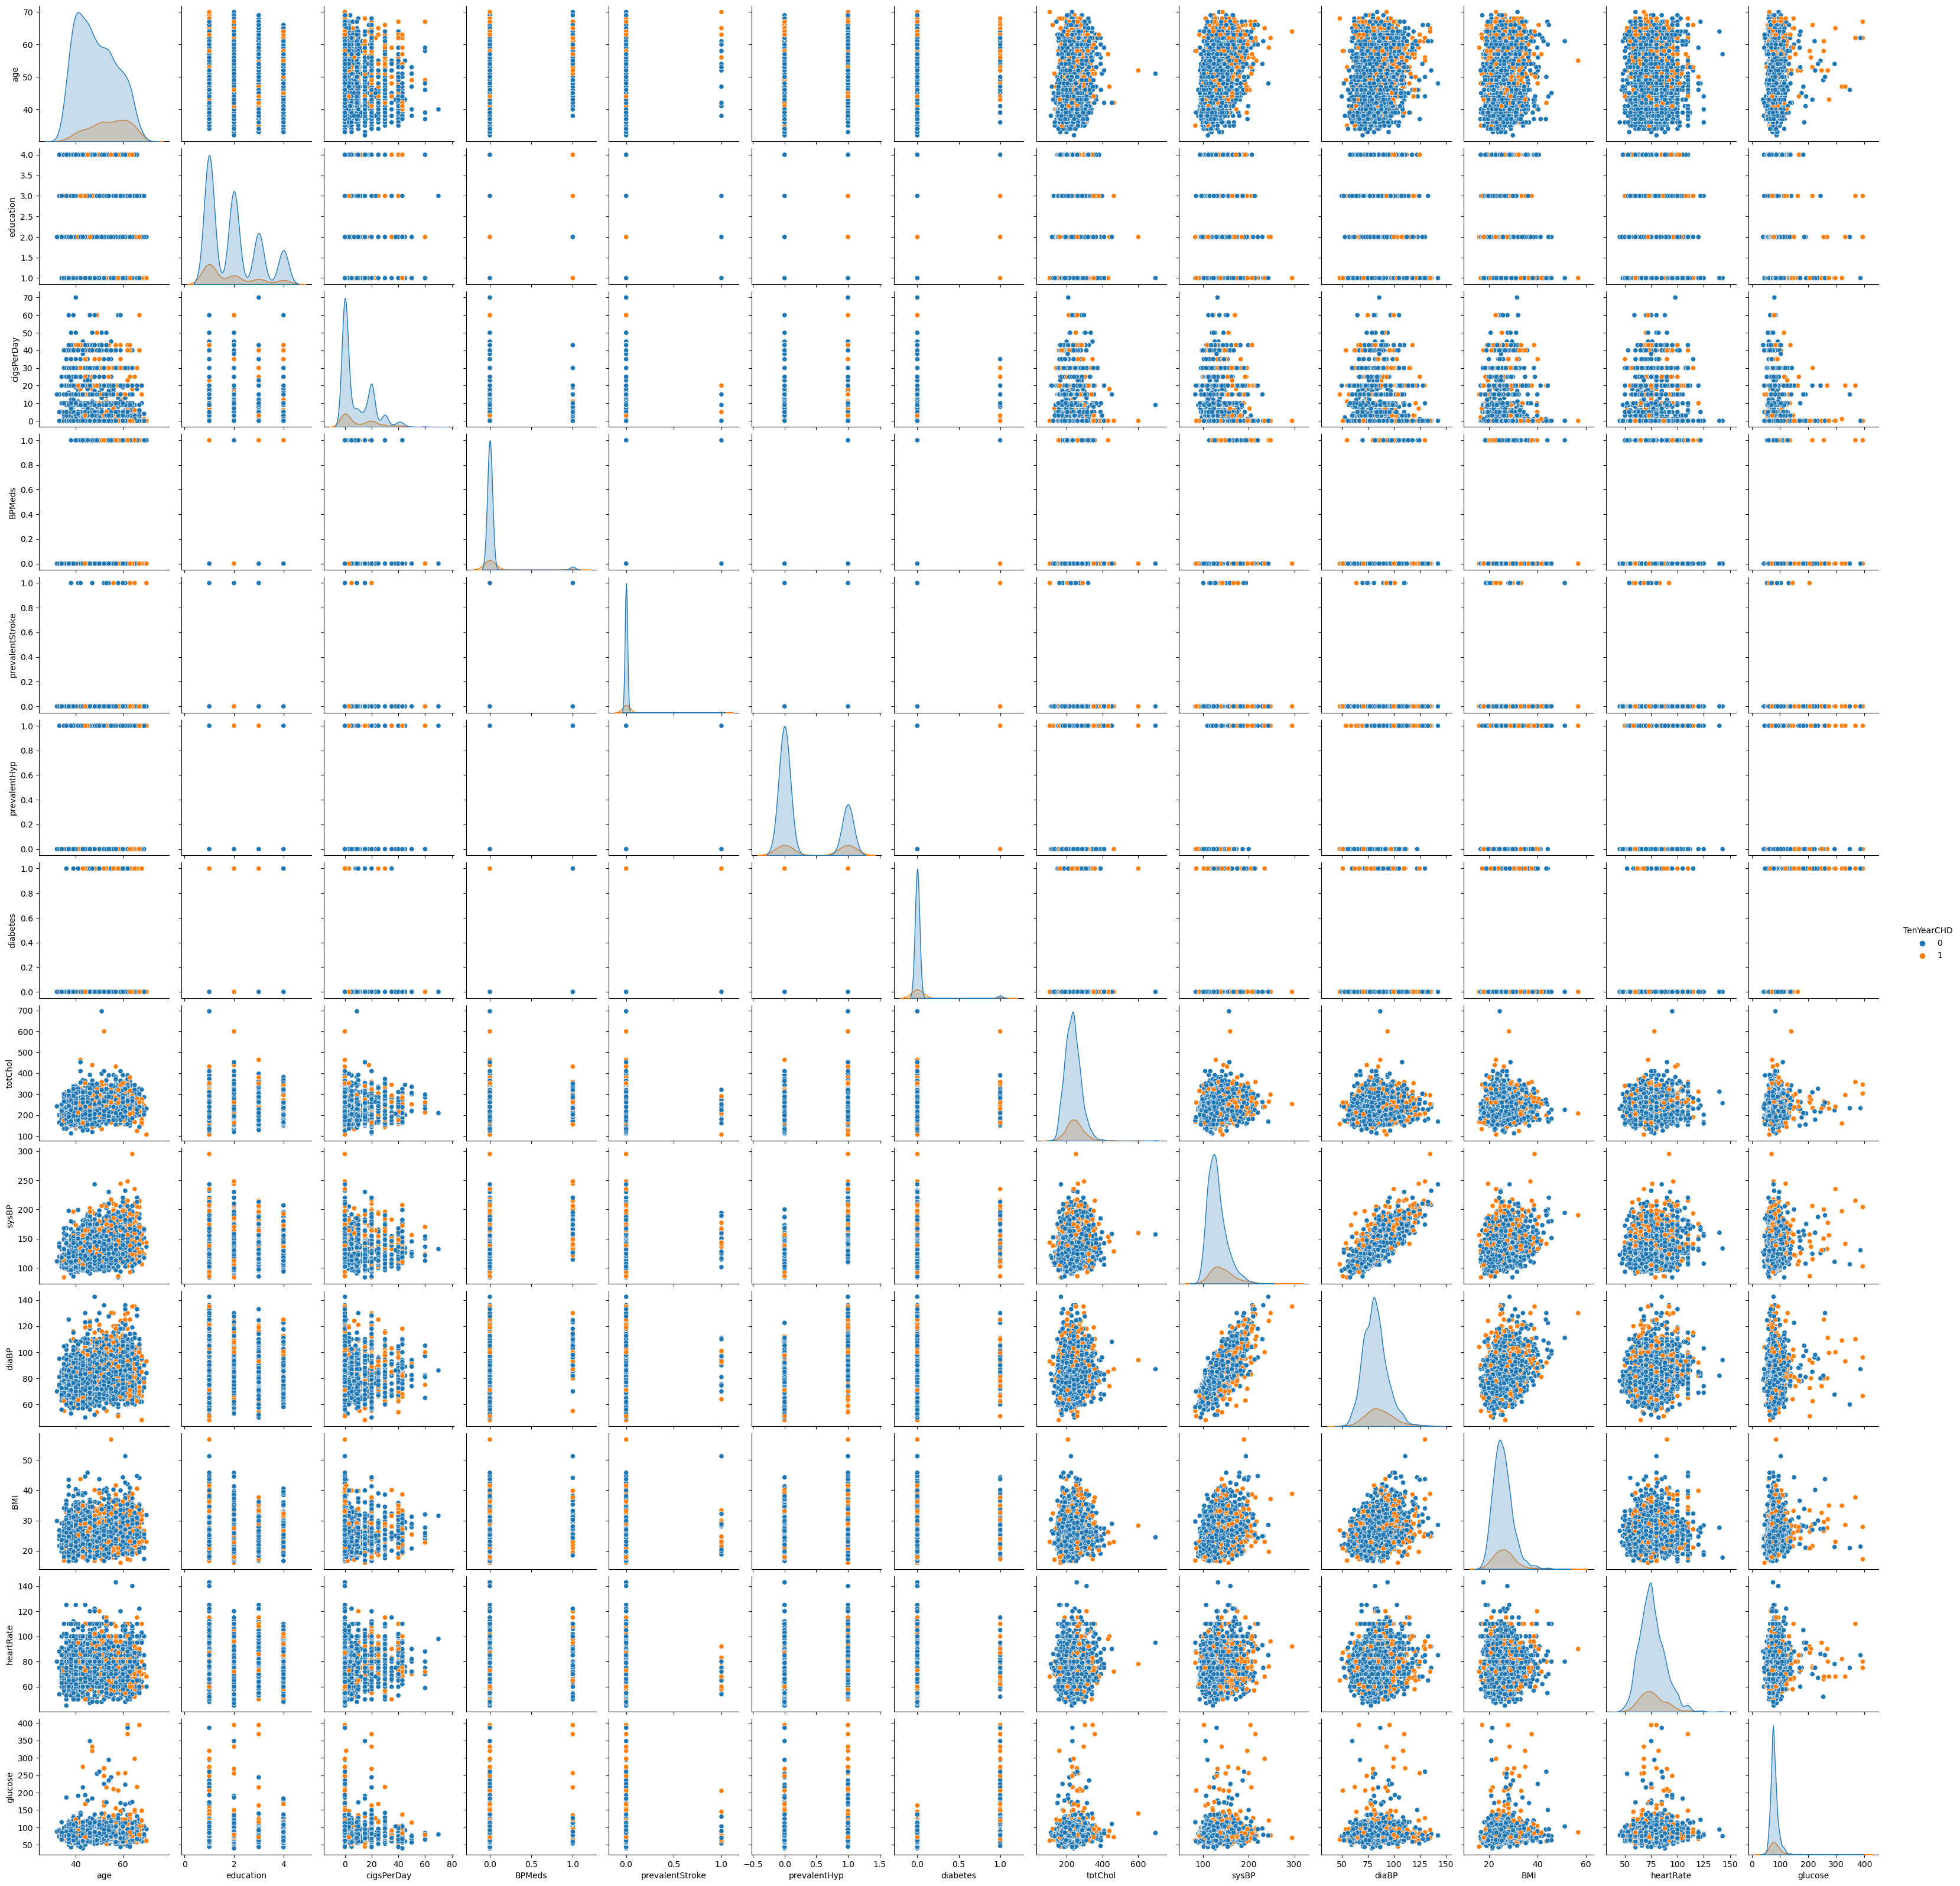

In [2105]:
# Pair Plot visualization code
sns.pairplot(df, hue="TenYearCHD")
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

We see that the cigs_per_day data distribution is highly skewed and it contains high 0 value so we can convert this into categorical column.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [2117]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [2126]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [2135]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 2. Handling Outliers

In [2142]:
initial_median = df.median()
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

# Define columns to consider for outlier removal
numerical_columns = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

# Identify outliers using IQR method
outliers = df[numerical_columns][((df[numerical_columns] < (q1 - 1.5 * iqr)) |
                                  (df[numerical_columns] > (q3 + 1.5 * iqr))).any(axis=1)]

# Calculate risk percentages for median after outlier removal
df_no_outliers = df.drop(outliers.index)
after_median = df_no_outliers.median()

risk_median = ((after_median - initial_median) / initial_median) * 100

# Display risk percentages
print("Risk Percentage for Median:\n", risk_median)  

Risk Percentage for Median:
 age               -2.04
education          0.00
cigsPerDay          NaN
BPMeds              NaN
prevalentStroke     NaN
prevalentHyp        NaN
diabetes            NaN
totChol           -0.85
sysBP             -1.17
diaBP             -1.22
BMI               -0.93
heartRate          0.00
glucose           -1.30
TenYearCHD          NaN
dtype: float64


##### What all outlier treatment techniques have you used and why did you use those techniques?

The above dataframe explains the effect of removal of outliers. If the outliers in this particular case are removed, it would cause removal of many rows with possible risk of CHD.

In this scenario, it is known that people with extreme values of Cholestrol, BP, Glucose, BMI etc. are prone to heart diseases. Hence, removal of higher numbers is not considered.

### 3. Categorical Encoding

In [2146]:
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64       2.00   F        YES        3.00    0.00                0   
1   36       4.00   M         NO        0.00    0.00                0   
2   46       1.00   F        YES       10.00    0.00                0   
3   50       1.00   M        YES       20.00    0.00                0   
4   64       1.00   F        YES       30.00    0.00                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP   BMI  heartRate  glucose  \
0             0         0   221.00 148.00  85.00 22.91      90.00    80.00   
1             1         0   212.00 168.00  98.00 29.77      72.00    75.00   
2             0         0   250.00 116.00  71.00 20.35      88.00    94.00   
3             1         0   233.00 158.00  88.00 28.26      68.00    94.00   
4             0         0   241.00 136.50  85.00 26.42      70.00    77.00   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [2147]:
# Encode your categorical columns
df = pd.get_dummies(df, columns=['sex'])

In [2148]:
df = df.drop(columns=['sex_F'],axis=1)
df = df.rename(columns={'sex_M':'sex'})
df.head()

age  education is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64       2.00        YES        3.00    0.00                0   
1   36       4.00         NO        0.00    0.00                0   
2   46       1.00        YES       10.00    0.00                0   
3   50       1.00        YES       20.00    0.00                0   
4   64       1.00        YES       30.00    0.00                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP   BMI  heartRate  glucose  \
0             0         0   221.00 148.00  85.00 22.91      90.00    80.00   
1             1         0   212.00 168.00  98.00 29.77      72.00    75.00   
2             0         0   250.00 116.00  71.00 20.35      88.00    94.00   
3             1         0   233.00 158.00  88.00 28.26      68.00    94.00   
4             0         0   241.00 136.50  85.00 26.42      70.00    77.00   

   TenYearCHD  sex  
0           1    0  
1           0    1  
2           0    0  
3           1    1  
4           0    0

In [2149]:
# Adding pulse pressure as a column
df['pulsePressure'] = df['sysBP'] - df['diaBP']

In [2150]:
# Dropping the systolic and diastolic BP columns
df.drop(['sysBP','diaBP'], axis = 1, inplace = True)

#### We can also drop the 'is_smoking' column, if cigarettes per day is more than 0 then the is_smoking column is 1 (YES). Hence, they both have the same meaning.

In [2152]:
# Dropping the 'is_smoking' column
df.drop('is_smoking', axis = 1, inplace = True)

In [2153]:
df = df[['age', 'education', 'sex', 'cigsPerDay','pulsePressure', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]

In [2154]:
df.head(2)

age  education  sex  cigsPerDay  pulsePressure  BPMeds  prevalentStroke  \
0   64       2.00    0        3.00          63.00    0.00                0   
1   36       4.00    1        0.00          70.00    0.00                0   

   prevalentHyp  diabetes  totChol   BMI  heartRate  glucose  TenYearCHD  
0             0         0   221.00 22.91      90.00    80.00           1  
1             1         0   212.00 29.77      72.00    75.00           0

In [2155]:
dependent_vars = df.iloc[:,-1:]
independent_vars = df.iloc[:,:-1]

### 4. Feature Manipulation & Selection

#### Feature Manipulation

In [2158]:
# Manipulate Features to minimize feature correlation and create new features
# Detecting the multicollinearity using VIF Values.
# Calculating VIF(Variance Inflation Factor) to see the correlation between independent variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [2159]:
cal_vif(df[[i for i in df.describe().columns if i not in ['TenYearCHD']]])

variables   VIF
0               age 39.71
1         education  4.47
2               sex  2.10
3        cigsPerDay  1.88
4     pulsePressure 20.02
5            BPMeds  1.13
6   prevalentStroke  1.03
7      prevalentHyp  2.11
8          diabetes  1.56
9           totChol 30.20
10              BMI 35.91
11        heartRate 34.40
12          glucose 20.02

#### As we can see above some features are having high correlation but this features are very important for predicting TenYearCHD. Hence we cannot remove these features.

### 8. Handling Imbalanced Dataset

In [2162]:
df.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

#### It looks like we are dealing with an imbalanced dataset in the 'TenYearCHD' column, where one class has significantly more samples than the other. In this case, there are 2879 samples with the value 0 and 511 samples with the value 1.¶

In [2164]:
from imblearn.over_sampling import SMOTE

In [2165]:
# Creating an instance for SMOTE
oversample = SMOTE()

In [2166]:
X = independent_vars
y = dependent_vars

In [2167]:
# The rows and columns of X and y
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns before oversampling')
print(f'y has {y.shape[0]} rows before oversampling')

X has 3390 rows and 13 columns before oversampling
y has 3390 rows before oversampling


In [2168]:
# Using SMOTE to oversample
X,y = oversample.fit_resample(X,y)

In [2169]:
# Counts of each classes after oversampling
y.value_counts()

TenYearCHD
0             2879
1             2879
dtype: int64

In [2170]:
# Rows in the dataset after oversampling
print(f'Number of rows after oversampling in X is {len(X)}')
print(f'Number of rows after oversampling in y is {len(y)}')

Number of rows after oversampling in X is 5758
Number of rows after oversampling in y is 5758


#### Now both the classes are of equal size and the predictions will not be biased.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE is chosen to handle the imbalanced dataset because it addresses the class imbalance issue by creating synthetic samples, which helps in achieving a more balanced class distribution. This approach avoids the drawbacks of undersampling (removing instances from the majority class) and provides more data for the minority class without introducing bias by simply duplicating existing instances.n.

### 6. Data Splitting

In [2175]:
X = independent_vars.values
y = dependent_vars.values

In [2176]:
from sklearn.model_selection import train_test_split

In [2177]:
# Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [2178]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2712, 13)
(678, 13)
(2712, 1)
(678, 1)


### 6. Data Scaling

In [2180]:
# Scaling your data
# The numbers in the data have different ranges, hence, we will scale the data using the Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

In [2181]:
scaler = MinMaxScaler()

In [2182]:
X_train = scaler.fit_transform(X_train)

In [2183]:
X_test = scaler.transform(X_test)

In [2184]:
!pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [2185]:
from lazypredict.Supervised import LazyClassifier

In [2186]:
lazy = LazyClassifier()

In [2187]:
lazy.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:03<00:00,  7.67it/s]

[LightGBM] [Info] Number of positive: 400, number of negative: 2312
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 2712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.147493 -> initscore=-1.754404
[LightGBM] [Info] Start training from score -1.754404


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 NearestCentroid                    0.71               0.64     0.64      0.74   
 PassiveAggressiveClassifier        0.73               0.62     0.62      0.75   
 Perceptron                         0.72               0.57     0.57      0.74   
 AdaBoostClassifier                 0.84               0.57     0.57      0.80   
 GaussianNB                         0.82               0.56     0.56      0.79   
 LinearDiscriminantAnalysis         0.84               0.56     0.56      0.80   
 QuadraticDiscriminantAnalysis      0.82               0.56     0.56      0.79   
 BernoulliNB                        0.81               0.55     0.55      0.78   
 SGDClassifier                      0.82               0.55     0.55      0.79   
 LogisticRegression                 0.85               0.55     0.55      0.79   
 LGBMClassifier 

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [2190]:
# DImensionality Reduction (If needed)
df.head()

age  education  sex  cigsPerDay  pulsePressure  BPMeds  prevalentStroke  \
0   64       2.00    0        3.00          63.00    0.00                0   
1   36       4.00    1        0.00          70.00    0.00                0   
2   46       1.00    0       10.00          45.00    0.00                0   
3   50       1.00    1       20.00          70.00    0.00                0   
4   64       1.00    0       30.00          51.50    0.00                0   

   prevalentHyp  diabetes  totChol   BMI  heartRate  glucose  TenYearCHD  
0             0         0   221.00 22.91      90.00    80.00           1  
1             1         0   212.00 29.77      72.00    75.00           0  
2             0         0   250.00 20.35      88.00    94.00           0  
3             1         0   233.00 28.26      68.00    94.00           1  
4             0         0   241.00 26.42      70.00    77.00           0

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

##### What data splitting ratio have you used and why? 

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [2197]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [2199]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [2201]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [2208]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [2210]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [2218]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [2220]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [2222]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [2234]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [2236]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***